<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_400-450.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1122]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [1123]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

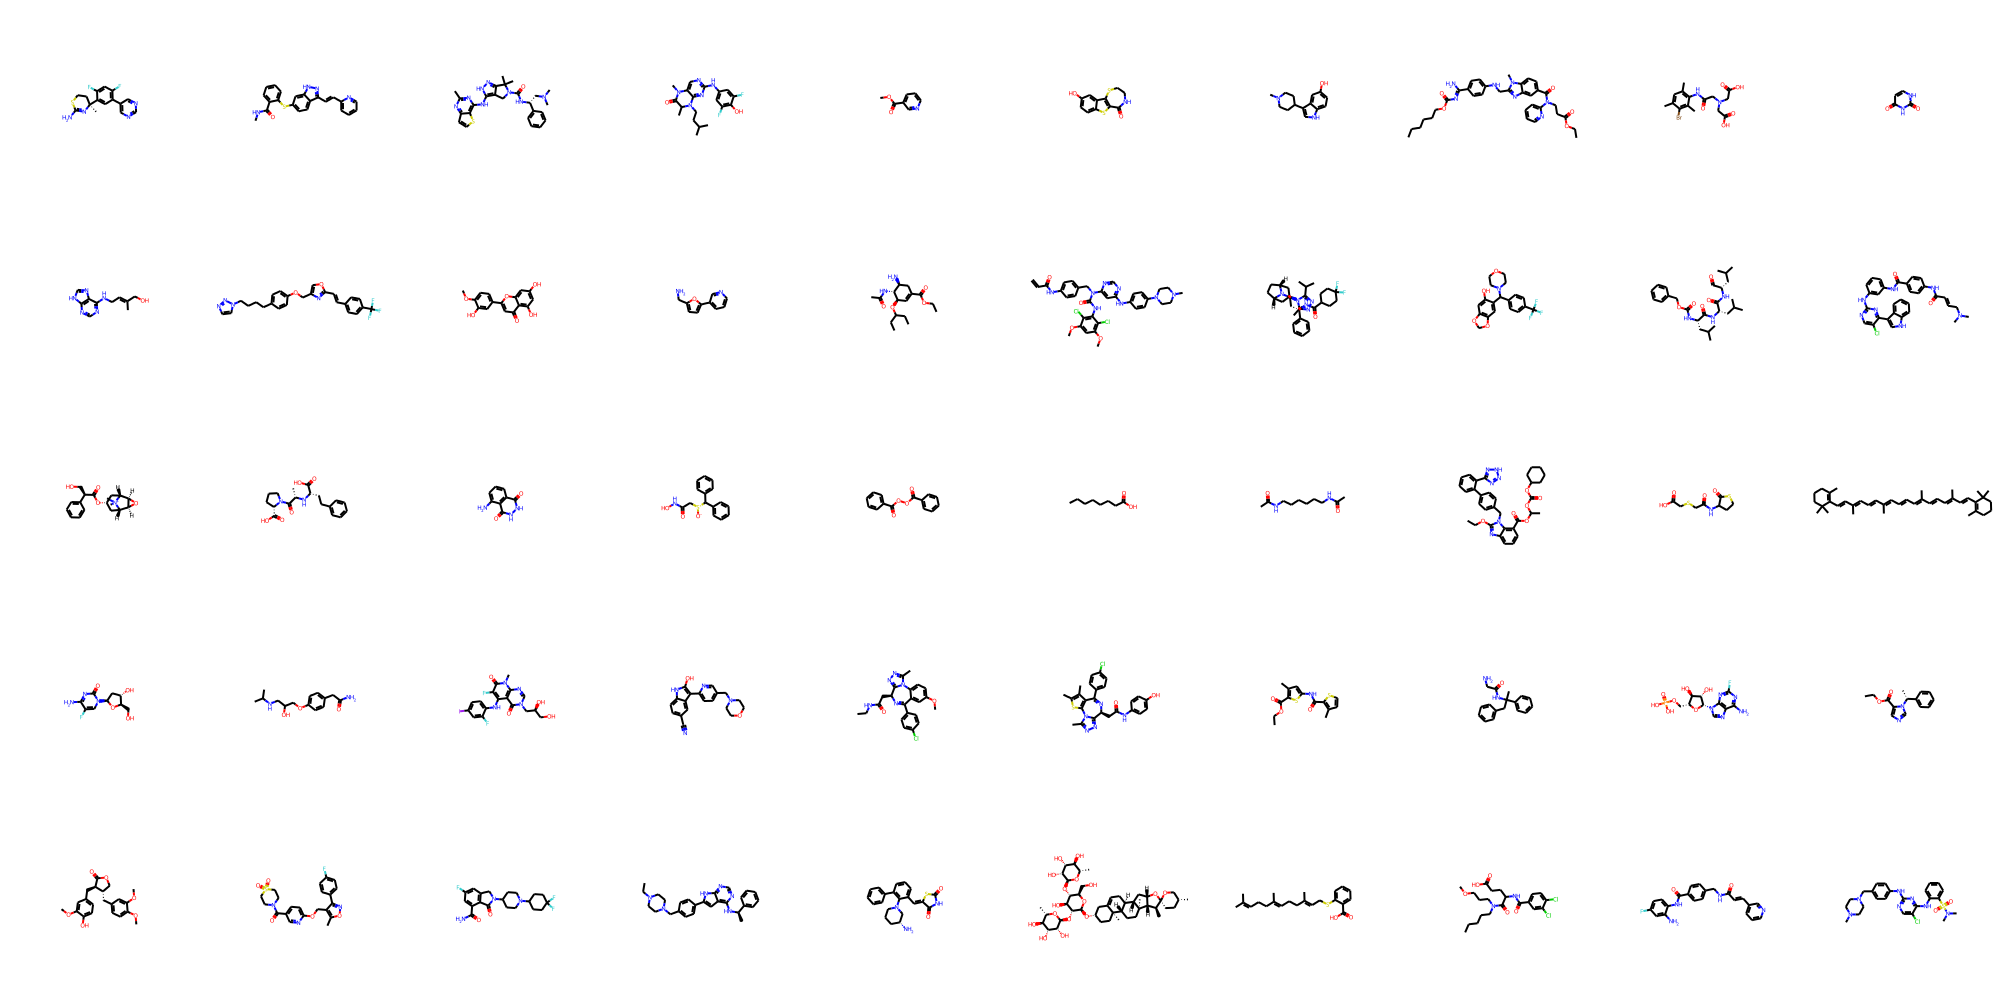

In [1124]:
smiles_list = ['C[C@@]1(c2cc(-c3cncnc3)c(F)cc2F)CCSC(N)=N1',
'CNC(=O)c1ccccc1Sc1ccc2c(/C=C/c3ccccn3)n[nH]c2c1',
'Cc1nc(Nc2[nH]nc3c2CN(C(=O)N[C@H](CN(C)C)c2ccccc2)C3(C)C)c2sccc2n1',
'CC(C)CCN1c2nc(Nc3cc(F)c(O)c(F)c3)ncc2N(C)C(=O)C1C',
'COC(=O)c1cccnc1',
'O=C1NCCSc2c1sc1ccc(O)cc21',
'CN1CCC(c2c[nH]c3ccc(O)cc23)CC1',
'CCCCCCOC(=O)/N=C(N)c1ccc(NCc2nc3cc(C(=O)N(CCC(=O)OCC)c4ccccn4)ccc3n2C)cc1',
'Cc1cc(C)c(NC(=O)CN(CC(=O)O)CC(=O)O)c(C)c1Br',
'O=c1cc[nH]c(=O)[nH]1',
'C/C(=C\CNc1ncnc2[nH]cnc12)CO',
'FC(F)(F)c1ccc(/C=C/c2nc(COc3ccc(CCCCn4ccnn4)cc3)co2)cc1',
'COc1ccc(-c2cc(=O)c3c(O)cc(O)cc3o2)cc1O',
'NCc1ccc(-c2cccnc2)o1',
'CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@@H](N)C1',
'C=CC(=O)Nc1ccc(CN(C(=O)Nc2c(Cl)c(OC)cc(OC)c2Cl)c2cc(Nc3ccc(N4CCN(C)CC4)cc3)ncn2)cc1',
'Cc1nnc(C(C)C)n1[C@H]1C[C@@H]2CC[C@H](C1)N2CC[C@H](NC(=O)C1CCC(F)(F)CC1)c1ccccc1',
'Oc1cc2c(cc1C(c1ccc(C(F)(F)F)cc1)N1CCOCC1)OCO2',
'CC(C)C[C@@H](C=O)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(C)C)NC(=O)OCc1ccccc1',
'CN(C)C/C=C/C(=O)Nc1ccc(C(=O)Nc2cccc(Nc3ncc(Cl)c(-c4c[nH]c5ccccc45)n3)c2)cc1',
'C[N+]1(C)[C@H]2C[C@H](OC(=O)[C@H](CO)c3ccccc3)C[C@@H]1[C@H]1O[C@@H]21',
'C[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CCC[C@H]1C(=O)O',
'Nc1cccc2c(=O)[nH][nH]c(=O)c12',
'O=C(C[S+]([O-])C(c1ccccc1)c1ccccc1)NO',
'O=C(OOC(=O)c1ccccc1)c1ccccc1',
'CCCCCCCC(=O)O',
'CC(=O)NCCCCCCNC(C)=O',
'CCOc1nc2cccc(C(=O)OC(C)OC(=O)OC3CCCCC3)c2n1Cc1ccc(-c2ccccc2-c2nn[nH]n2)cc1',
'O=C(O)CSCC(=O)NC1CCSC1=O',
'CC1=C(/C=C/C(C)=C/C=C/C(C)=C/C=C/C=C(C)/C=C/C=C(C)/C=C/C2=C(C)CCCC2(C)C)C(C)(C)CCC1',
'Nc1nc(=O)n([C@H]2C[C@H](O)[C@@H](CO)O2)cc1F',
'CC(C)NCC(O)COc1ccc(CC(N)=O)cc1',
'Cn1c(=O)c(F)c(Nc2ccc(I)cc2F)c2c(=O)n(C[C@@H](O)CO)cnc21',
'N#Cc1ccc2[nH]c(O)c(-c3ccc(CN4CCOCC4)cn3)c2c1',
'CCNC(=O)C[C@@H]1N=C(c2ccc(Cl)cc2)c2cc(OC)ccc2-n2c(C)nnc21',
'Cc1sc2c(c1C)C(c1ccc(Cl)cc1)=N[C@@H](CC(=O)Nc1ccc(O)cc1)c1nnc(C)n1-2',
'CCOC(=O)c1sc(NC(=O)c2sccc2C)cc1C',
'CC(Cc1ccccc1)(NC(=O)CN)c1ccccc1',
'Nc1nc(F)nc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)O)[C@@H](O)[C@@H]1O',
'CCOC(=O)c1cncn1[C@H](C)c1ccccc1',
'COc1cc(C[C@H]2C(=O)OC[C@@H]2Cc2ccc(OC)c(OC)c2)ccc1O',
'Cc1onc(-c2ccc(F)cc2)c1COc1ccc(C(=O)N2CCS(=O)(=O)CC2)cn1',
'NC(=O)c1cc(F)cc2c1C(=O)N(C1CCN(C3CCC(F)(F)CC3)CC1)C2',
'CCN1CCN(Cc2ccc(-c3cc4c(N[C@H](C)c5ccccc5)ncnc4[nH]3)cc2)CC1',
'N[C@@H]1CCCN(c2c(/C=C3\SC(=O)NC3=O)cccc2-c2ccccc2)C1',
'C[C@@H]1O[C@@H](O[C@H]2[C@H](O)[C@@H](O[C@@H]3O[C@@H](C)[C@H](O)[C@@H](O)[C@H]3O)[C@H](O[C@H]3CC[C@@]4(C)C(=CC[C@H]5[C@@H]6C[C@@H]7O[C@]8(CC[C@@H](C)CO8)[C@@H](C)[C@@H]7[C@@]6(C)CC[C@@H]54)C3)O[C@@H]2CO)[C@H](O)[C@H](O)[C@H]1O',
'CC(C)=CCC/C(C)=C/CC/C(C)=C/CSc1ccccc1C(=O)O',
'CCCCCN(CCCOC)C(=O)C(CCC(=O)O)NC(=O)c1ccc(Cl)c(Cl)c1',
'Nc1cc(F)ccc1NC(=O)c1ccc(CNC(=O)/C=C/c2cccnc2)cc1',
'CN1CCN(Cc2ccc(Nc3ncc(Cl)c(Nc4ccccc4S(=O)(=O)N(C)C)n3)cc2)CC1',

]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



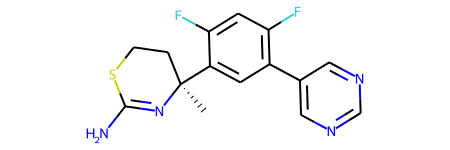

In [1125]:
M1 = mol_list [0]
M1

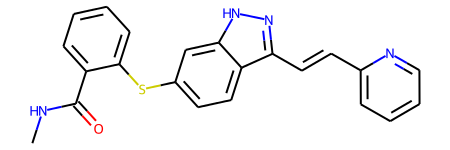

In [1126]:
M2 = mol_list [1]
M2

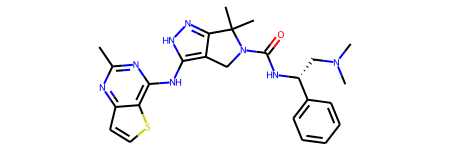

In [1127]:
M3 = mol_list [2]
M3

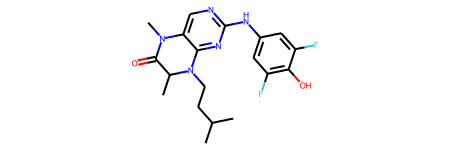

In [1128]:
M4 = mol_list [3]
M4

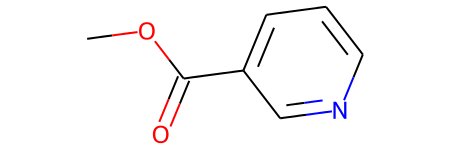

In [1129]:
M5 = mol_list [4]
M5

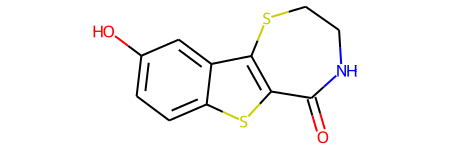

In [1130]:
M6 = mol_list [5]
M6

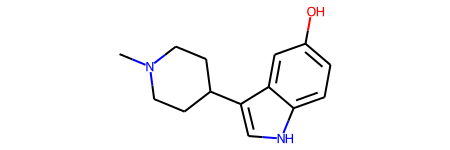

In [1131]:
M7 = mol_list [6]
M7

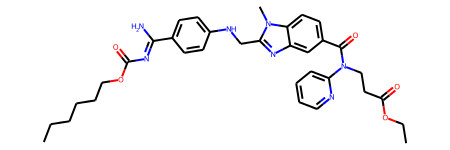

In [1132]:
M8 = mol_list [7]
M8

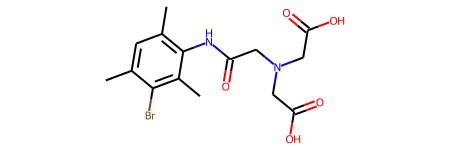

In [1133]:
M9 = mol_list [8]
M9

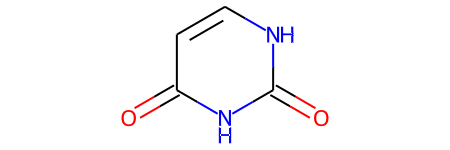

In [1134]:
M10= mol_list [9]
M10

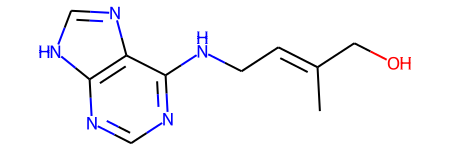

In [1135]:
M11= mol_list [10]
M11

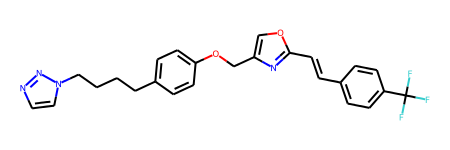

In [1136]:
M12= mol_list [11]
M12

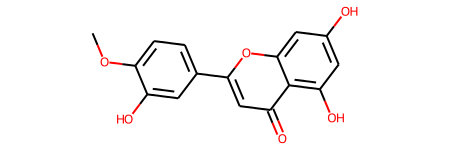

In [1137]:
M13= mol_list [12]
M13

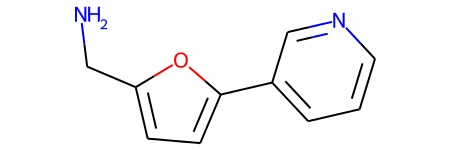

In [1138]:
M14= mol_list [13]
M14

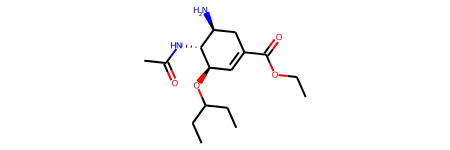

In [1139]:
M15= mol_list [14]
M15

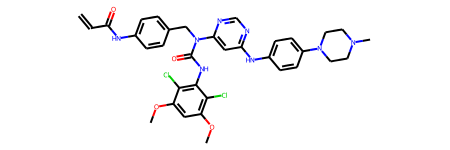

In [1140]:
M16= mol_list [15]
M16

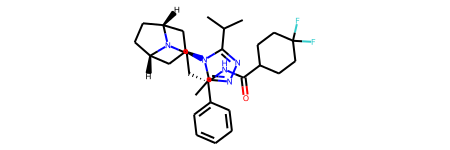

In [1141]:
M17= mol_list [16]
M17

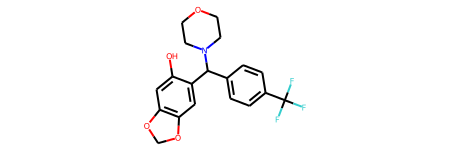

In [1142]:
M18= mol_list [17]
M18

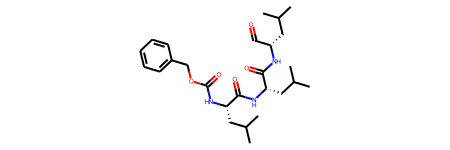

In [1143]:
M19= mol_list [18]
M19

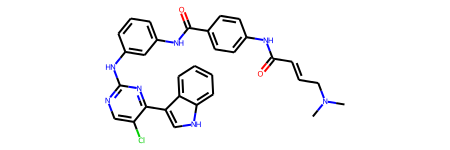

In [1144]:
M20= mol_list [19]
M20

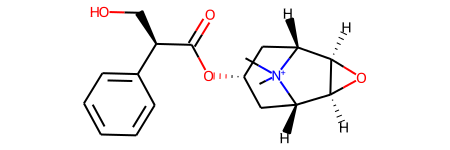

In [1145]:
M21= mol_list [20]
M21

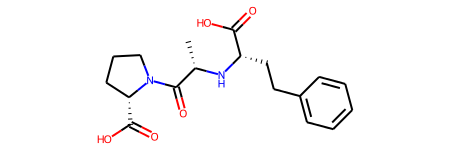

In [1146]:
M22= mol_list [21]
M22

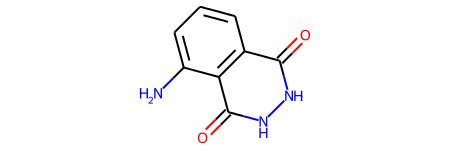

In [1147]:
M23= mol_list [22]
M23

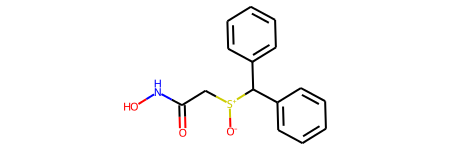

In [1148]:
M24= mol_list [23]
M24

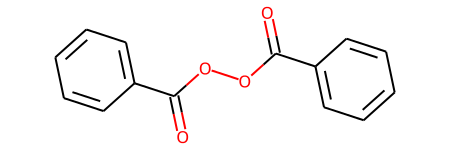

In [1149]:
M25= mol_list [24]
M25

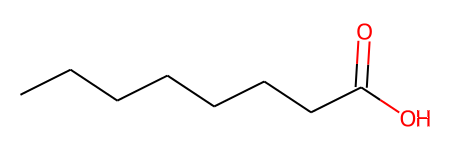

In [1150]:
M26= mol_list [25]
M26

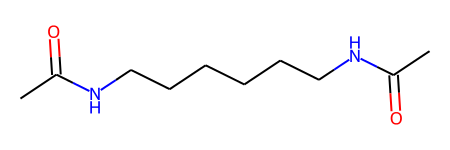

In [1151]:
M27= mol_list [26]
M27

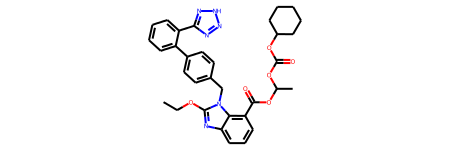

In [1152]:
M28= mol_list [27]
M28

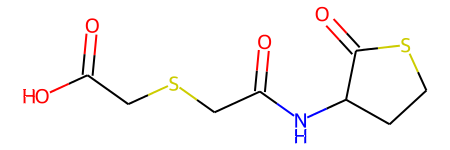

In [1153]:
M29= mol_list [28]
M29

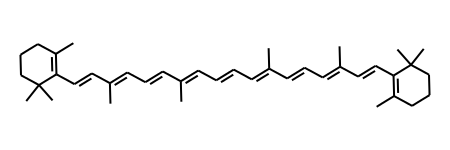

In [1154]:
M30= mol_list [29]
M30

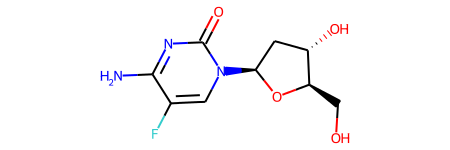

In [1155]:
M31= mol_list [30]
M31

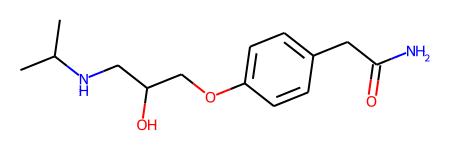

In [1156]:
M32= mol_list [31]
M32

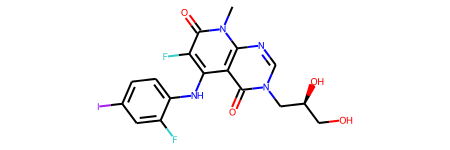

In [1157]:
M33= mol_list [32]
M33

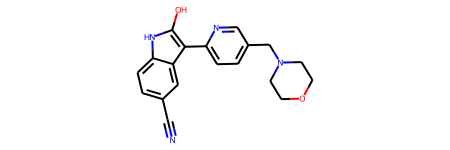

In [1158]:
M34= mol_list [33]
M34

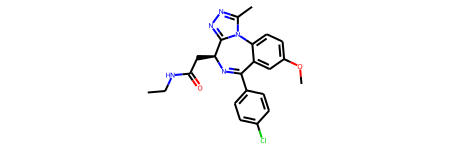

In [1159]:
M35= mol_list [34]
M35

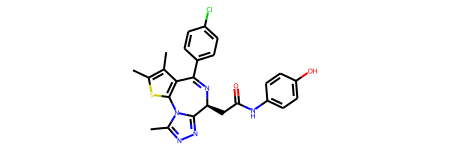

In [1160]:
M36= mol_list [35]
M36

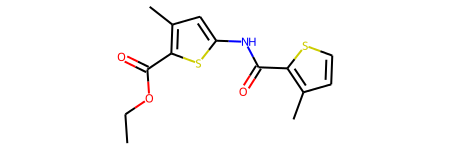

In [1161]:
M37= mol_list [36]
M37

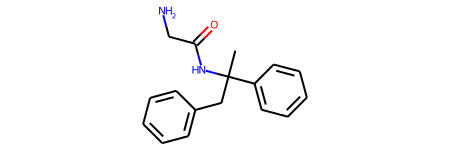

In [1162]:
M38= mol_list [37]
M38


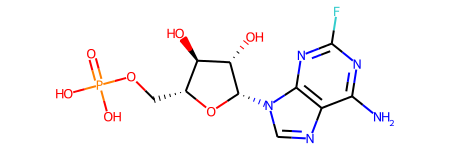

In [1163]:
M39= mol_list [38]
M39

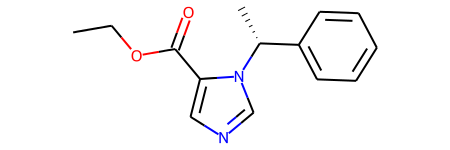

In [1164]:
M40= mol_list [39]
M40

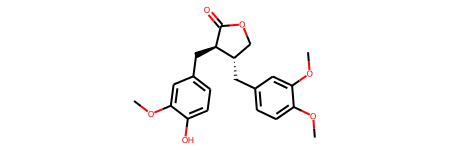

In [1165]:
M41= mol_list [40]
M41

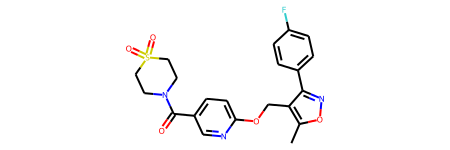

In [1166]:
M42= mol_list [41]
M42

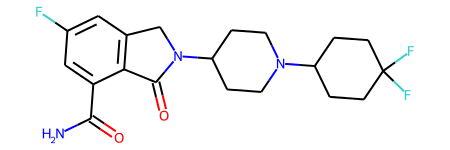

In [1167]:
M43= mol_list [42]
M43

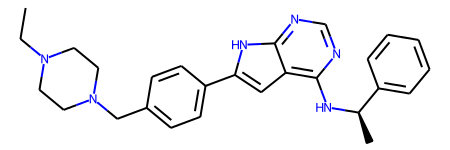

In [1168]:
M44= mol_list [43]
M44

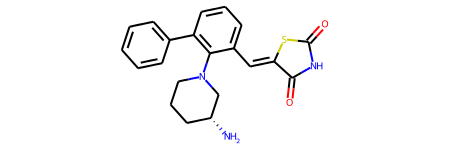

In [1169]:
M45= mol_list [44]
M45

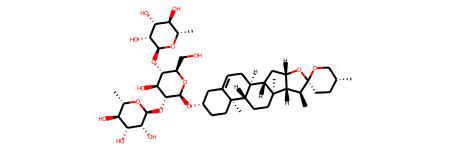

In [1170]:
M46= mol_list [45]
M46

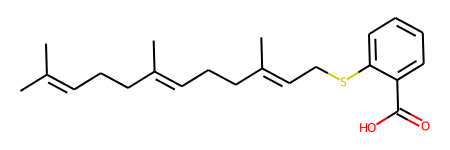

In [1171]:
M47= mol_list [46]
M47

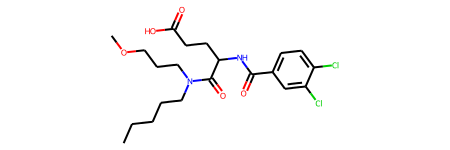

In [1172]:
M48= mol_list [47]
M48

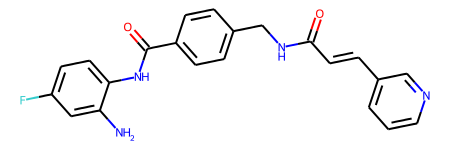

In [1173]:
M49= mol_list [48]
M49

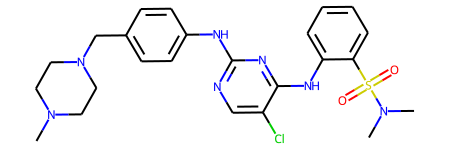

In [1174]:
M50= mol_list [49]
M50

In [1273]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[33,
 36,
 64,
 83,
 136,
 138,
 147,
 157,
 217,
 250,
 257,
 270,
 277,
 302,
 352,
 356,
 378,
 433,
 489,
 511,
 513,
 524,
 567,
 579,
 617,
 648,
 675,
 699,
 789,
 793,
 797,
 816,
 847,
 849,
 855,
 875,
 904,
 911,
 926,
 956,
 960]

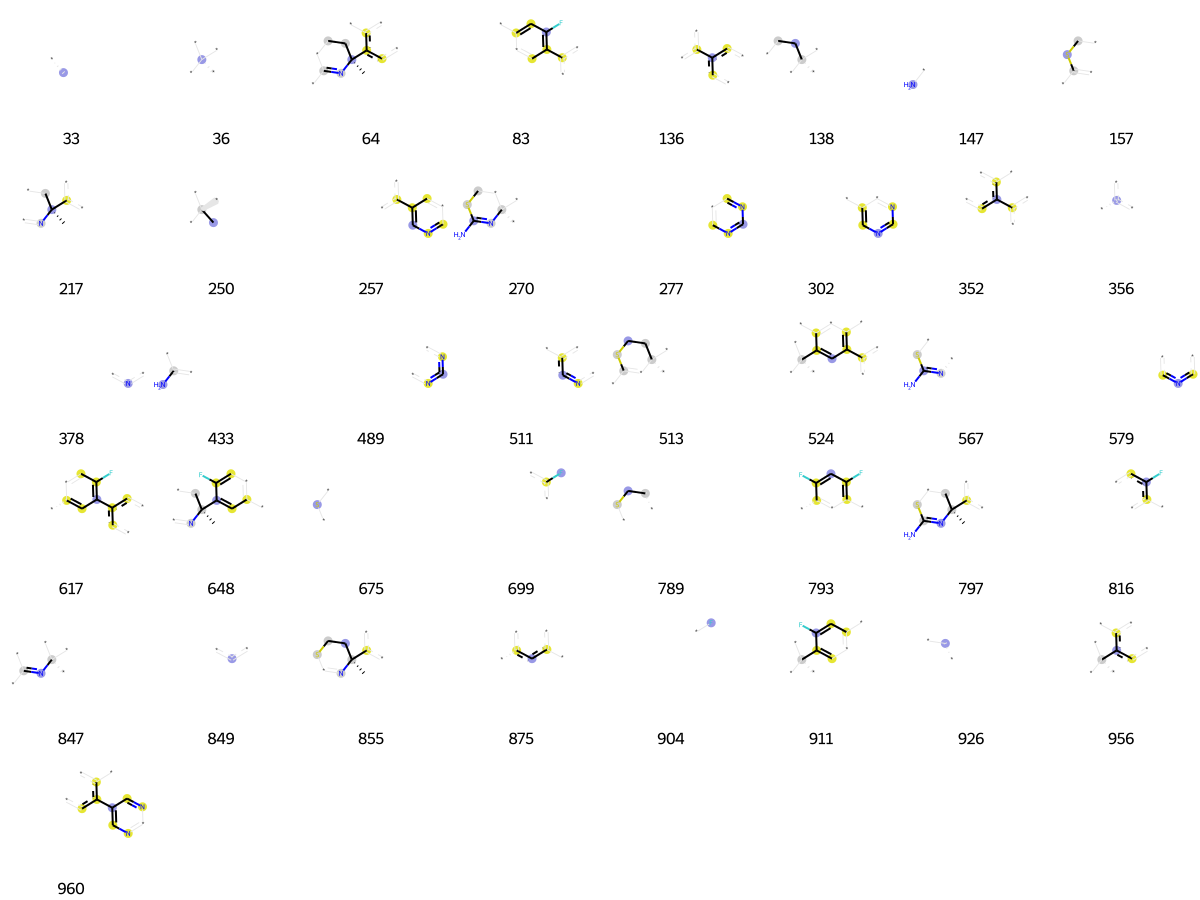

In [1275]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [1176]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[33,
 36,
 64,
 83,
 136,
 138,
 147,
 157,
 217,
 250,
 257,
 270,
 277,
 302,
 352,
 356,
 378,
 433,
 489,
 511,
 513,
 524,
 567,
 579,
 617,
 648,
 675,
 699,
 789,
 793,
 797,
 816,
 847,
 849,
 855,
 875,
 904,
 911,
 926,
 956,
 960]

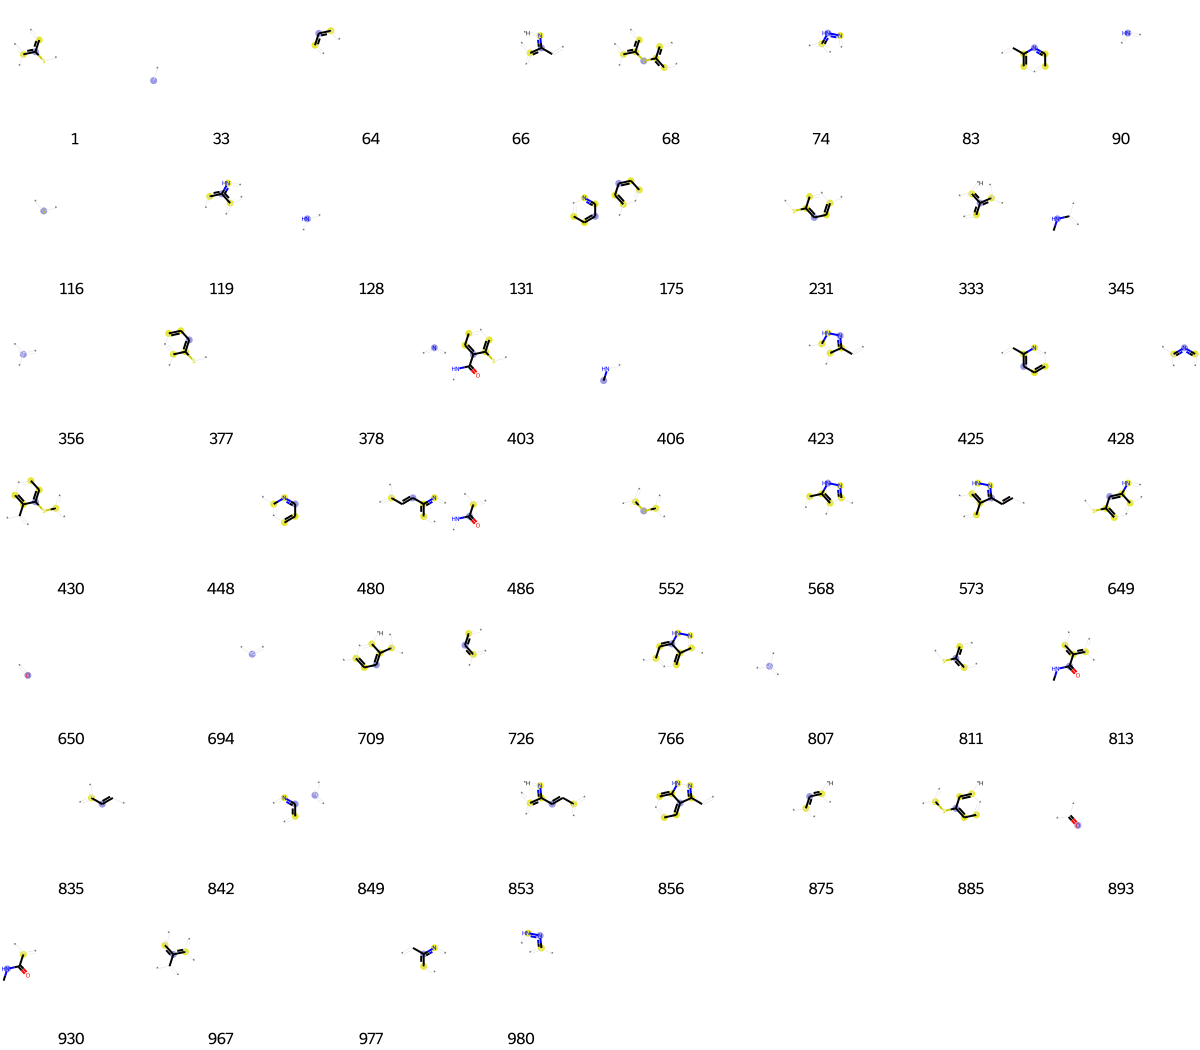

In [1177]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [1178]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 14,
 17,
 33,
 36,
 64,
 73,
 74,
 80,
 90,
 102,
 117,
 124,
 128,
 131,
 139,
 171,
 175,
 207,
 214,
 218,
 250,
 291,
 300,
 339,
 341,
 344,
 348,
 356,
 361,
 378,
 389,
 441,
 447,
 491,
 541,
 543,
 554,
 557,
 568,
 583,
 616,
 650,
 652,
 675,
 698,
 708,
 726,
 731,
 738,
 751,
 807,
 825,
 831,
 836,
 844,
 849,
 859,
 875,
 881,
 893,
 922,
 926,
 935,
 941,
 943,
 980,
 1001,
 1008]

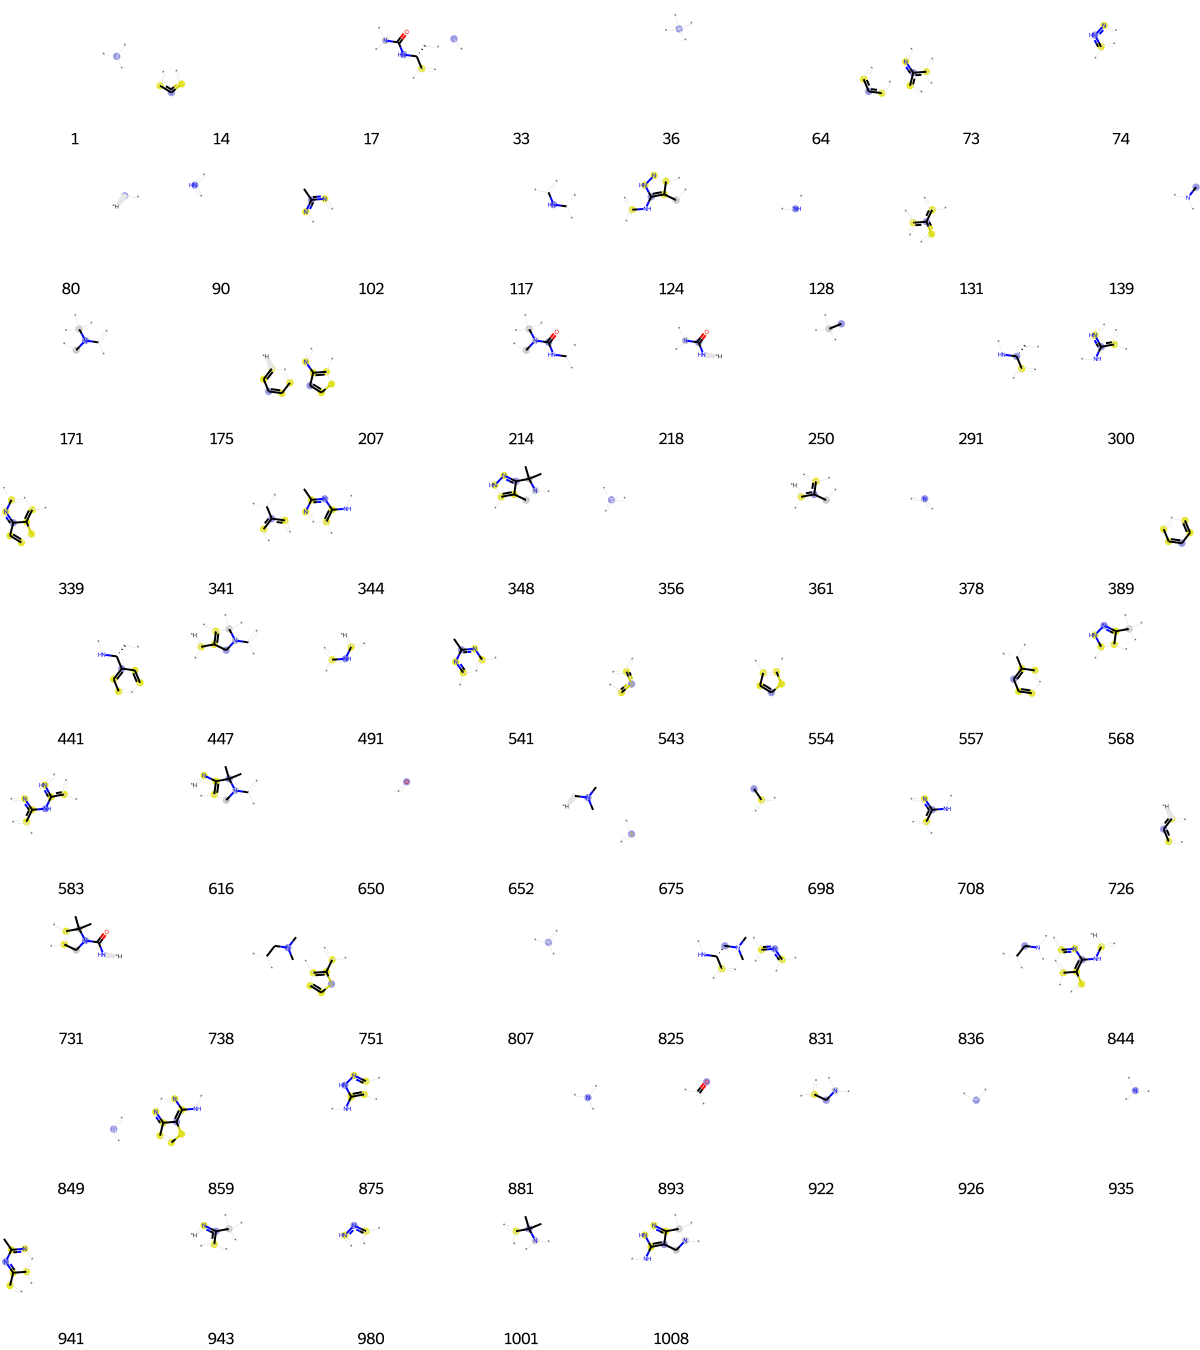

In [1179]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [1180]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[1,
 5,
 33,
 70,
 80,
 121,
 128,
 130,
 152,
 160,
 191,
 202,
 271,
 283,
 285,
 314,
 331,
 356,
 378,
 419,
 428,
 434,
 458,
 491,
 511,
 544,
 558,
 562,
 577,
 578,
 650,
 654,
 699,
 739,
 749,
 751,
 757,
 761,
 807,
 816,
 823,
 831,
 836,
 839,
 849,
 875,
 881,
 904,
 935,
 987,
 993,
 1019]

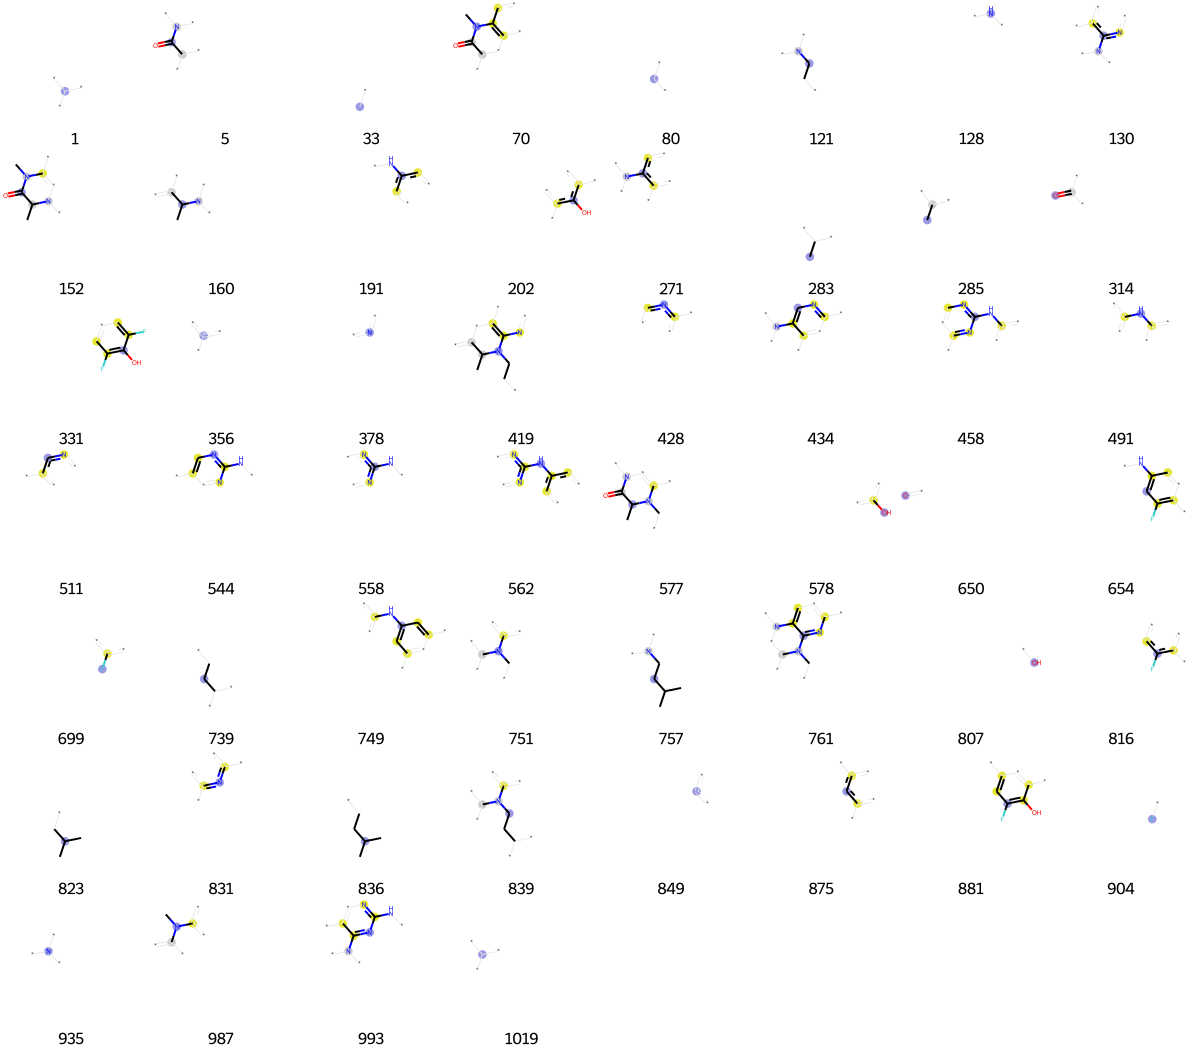

In [1181]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [1182]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[19,
 33,
 64,
 128,
 145,
 356,
 361,
 378,
 437,
 511,
 562,
 579,
 650,
 691,
 695,
 726,
 807,
 841,
 842,
 849,
 881,
 893,
 906,
 938,
 961]

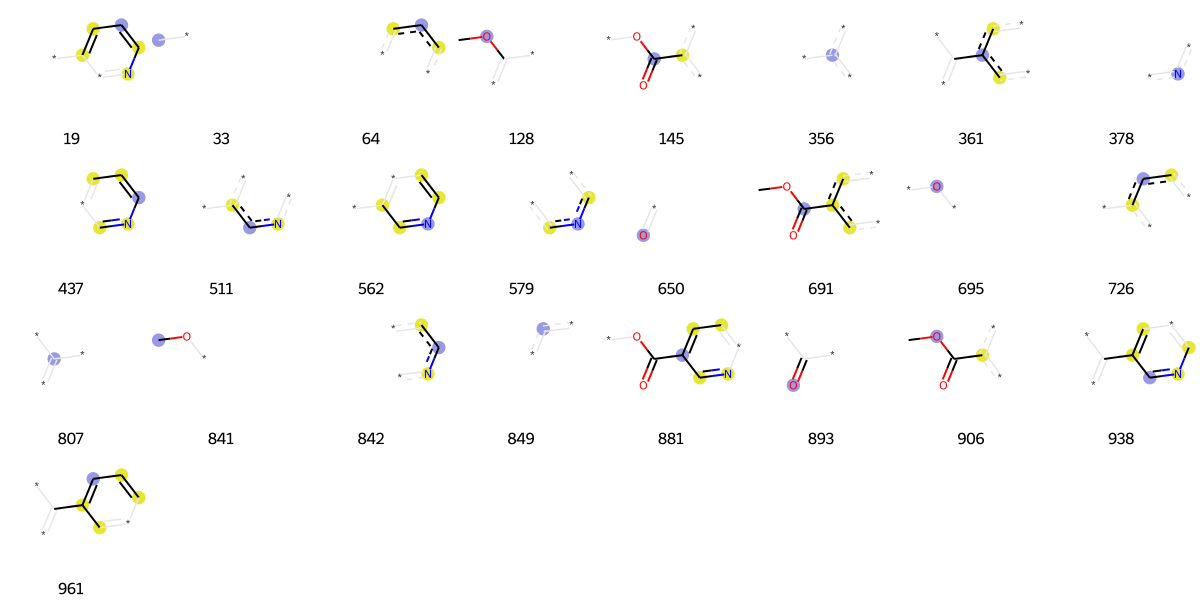

In [1183]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [1184]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[90,
 157,
 162,
 277,
 289,
 302,
 305,
 314,
 317,
 326,
 333,
 356,
 381,
 387,
 525,
 578,
 633,
 650,
 675,
 720,
 726,
 745,
 789,
 807,
 829,
 842,
 845,
 849,
 874,
 875,
 885,
 919,
 926,
 980,
 997]

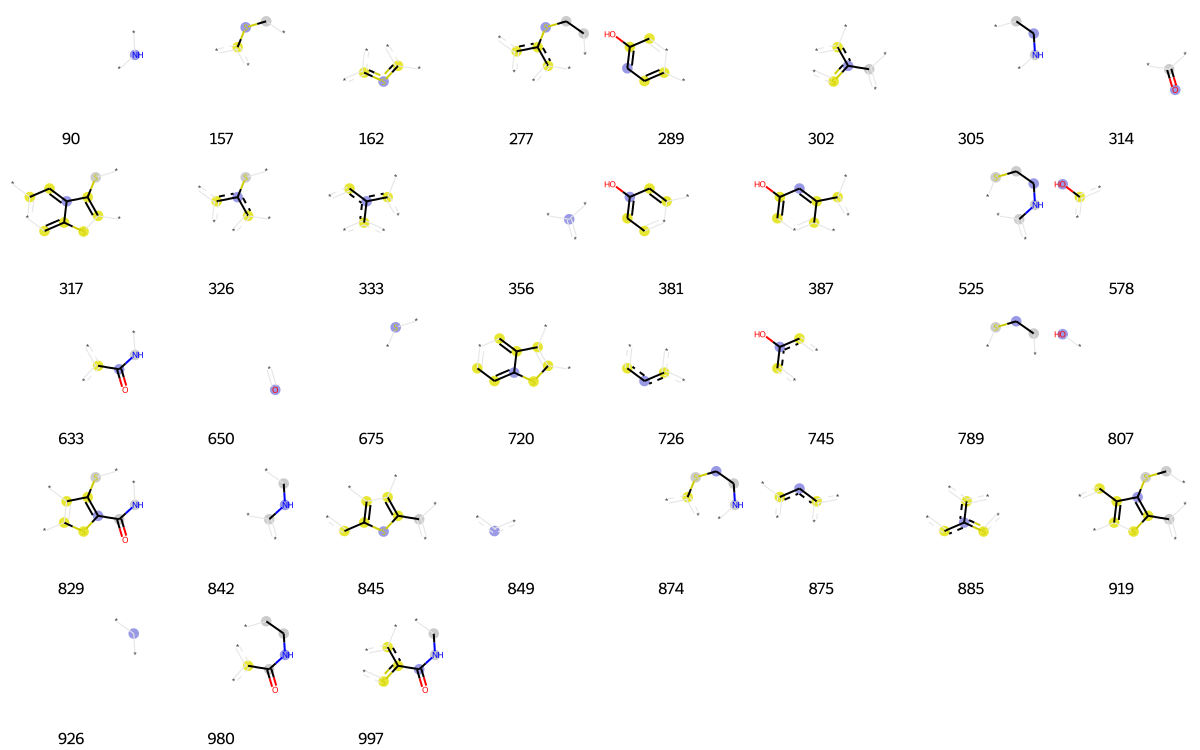

In [1185]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [1276]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[3,
 33,
 90,
 119,
 121,
 207,
 212,
 289,
 297,
 301,
 328,
 333,
 356,
 381,
 387,
 456,
 558,
 578,
 726,
 745,
 802,
 806,
 807,
 849,
 855,
 875,
 913,
 915,
 924,
 926,
 934,
 935,
 976,
 993,
 1019]

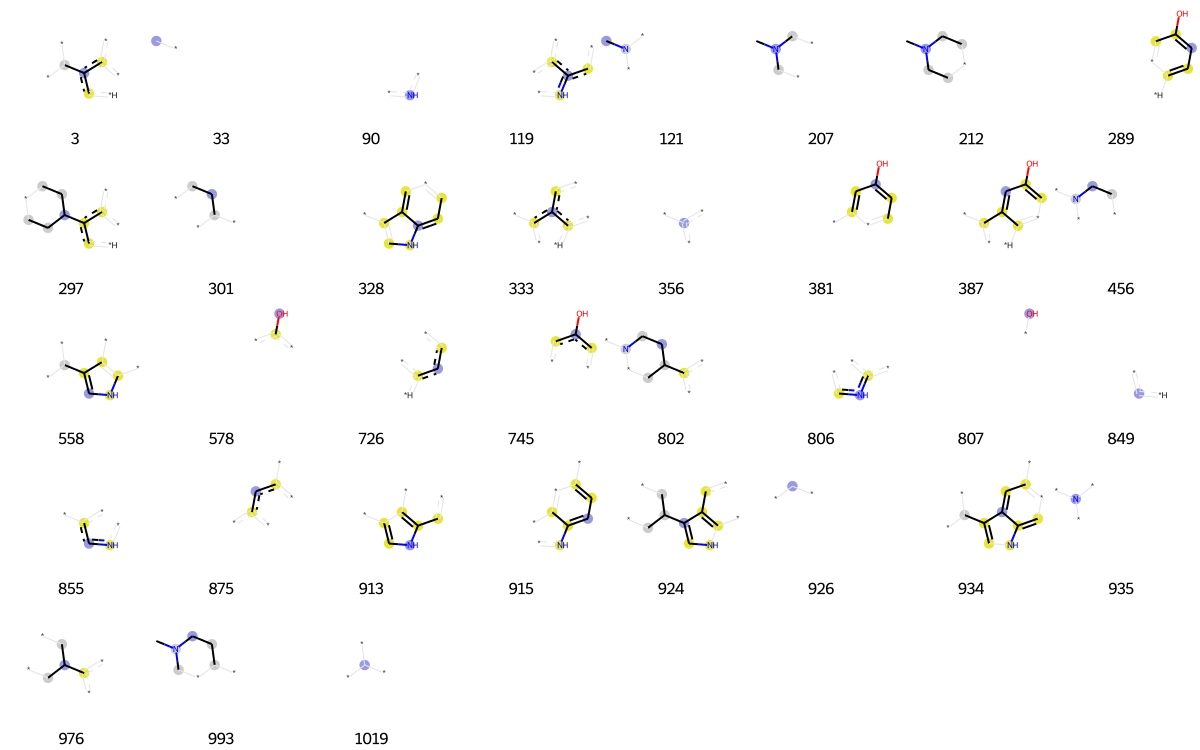

In [1277]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [1187]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[13,
 33,
 38,
 45,
 62,
 64,
 73,
 80,
 87,
 96,
 119,
 121,
 128,
 131,
 140,
 141,
 147,
 175,
 191,
 197,
 214,
 225,
 255,
 273,
 294,
 302,
 304,
 318,
 338,
 356,
 359,
 361,
 362,
 370,
 378,
 392,
 417,
 420,
 428,
 448,
 461,
 495,
 505,
 510,
 515,
 540,
 546,
 564,
 591,
 596,
 603,
 632,
 639,
 641,
 650,
 673,
 677,
 695,
 698,
 710,
 725,
 726,
 783,
 794,
 807,
 831,
 842,
 843,
 849,
 875,
 881,
 887,
 893,
 894,
 927,
 935,
 954,
 960,
 997,
 1009]

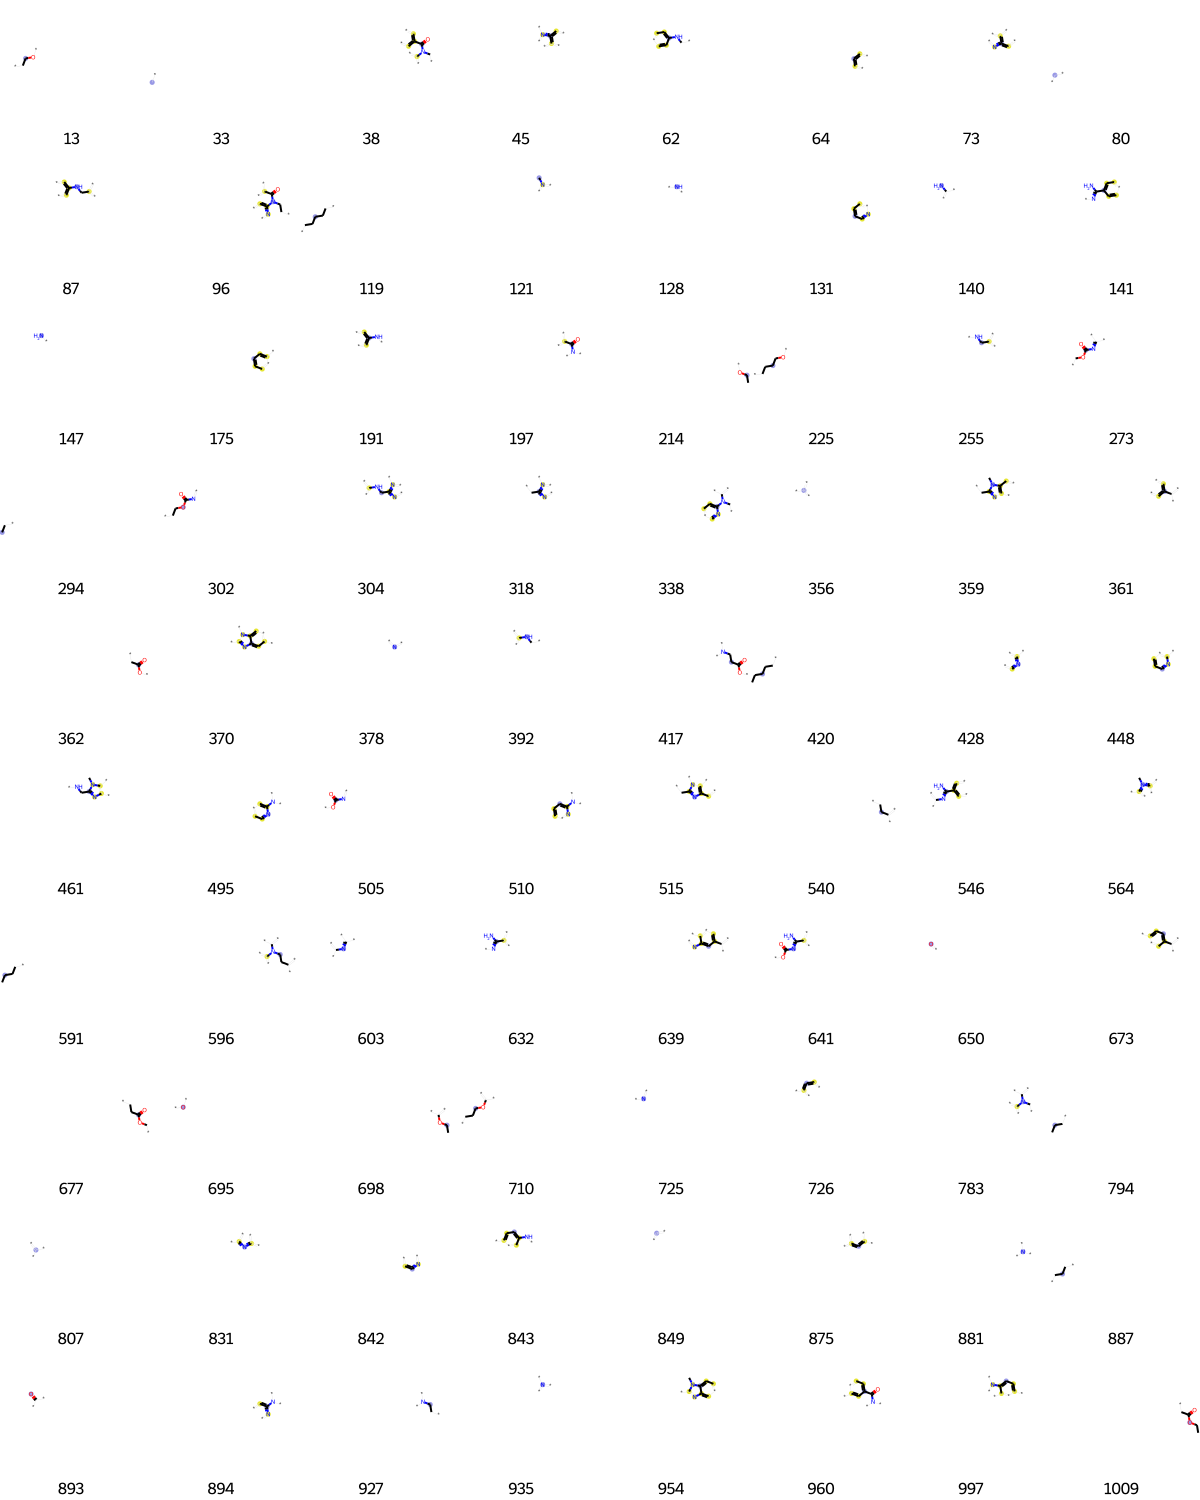

In [1188]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])

In [1189]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[33,
 41,
 80,
 128,
 166,
 188,
 247,
 251,
 252,
 268,
 276,
 356,
 367,
 381,
 389,
 434,
 474,
 540,
 605,
 607,
 649,
 650,
 651,
 668,
 698,
 707,
 713,
 728,
 792,
 807,
 849,
 875,
 881,
 890,
 893]

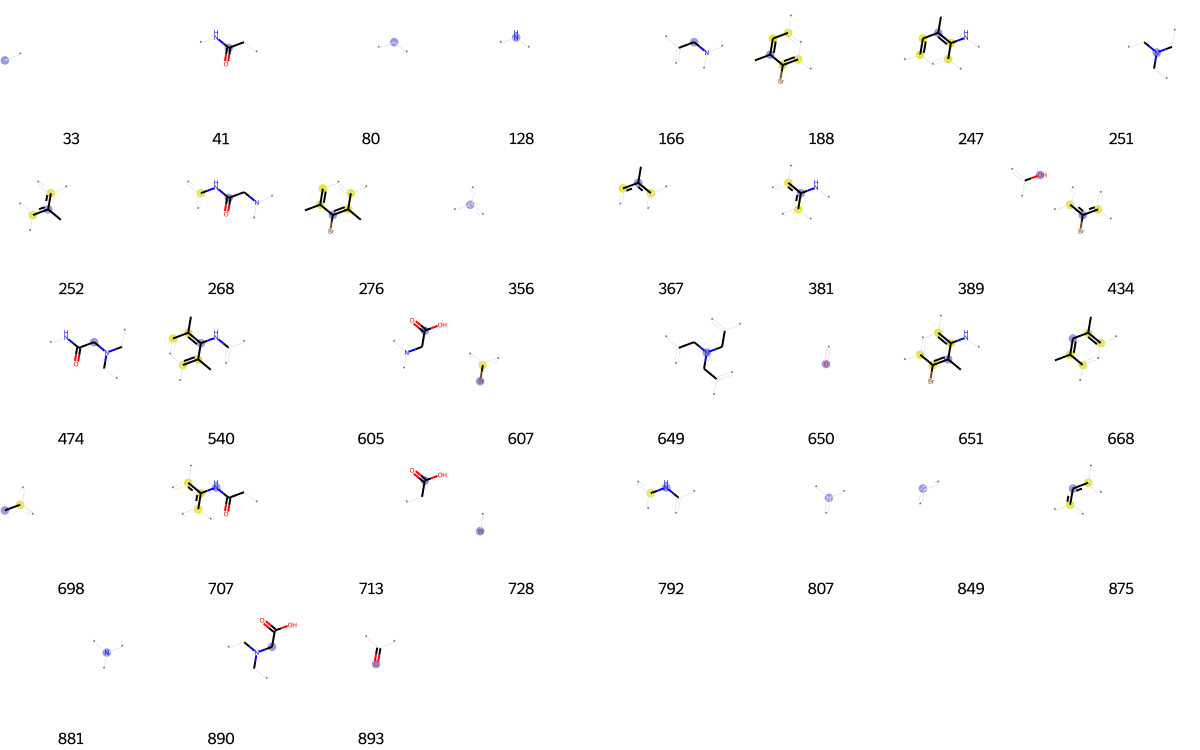

In [1190]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [1191]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[47,
 81,
 90,
 126,
 314,
 356,
 482,
 587,
 650,
 711,
 718,
 721,
 726,
 806,
 849,
 953,
 980]

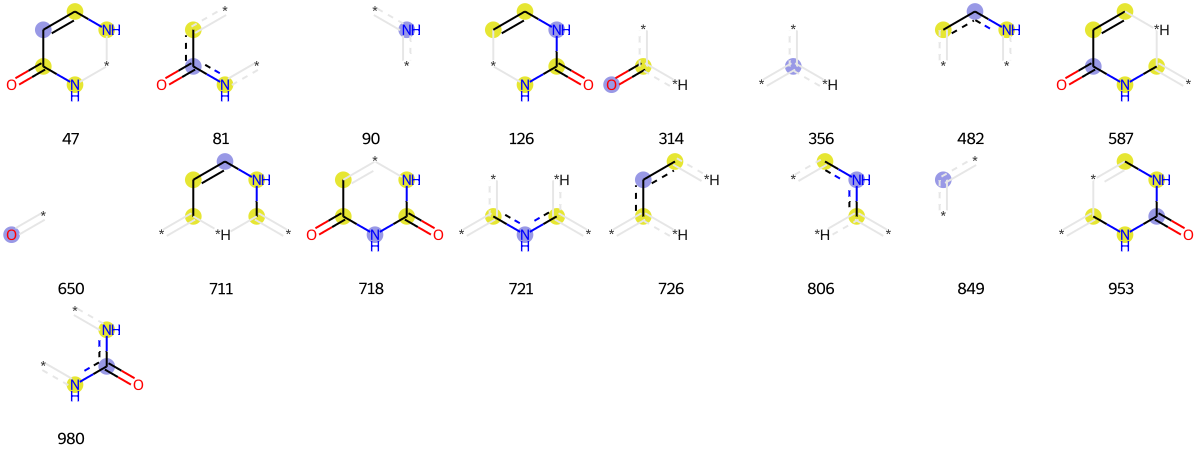

In [1192]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [1193]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[33,
 50,
 53,
 80,
 90,
 128,
 147,
 198,
 209,
 214,
 222,
 298,
 343,
 356,
 378,
 392,
 428,
 479,
 488,
 489,
 614,
 640,
 690,
 694,
 700,
 708,
 713,
 786,
 806,
 807,
 834,
 849,
 857,
 859,
 983,
 1017]

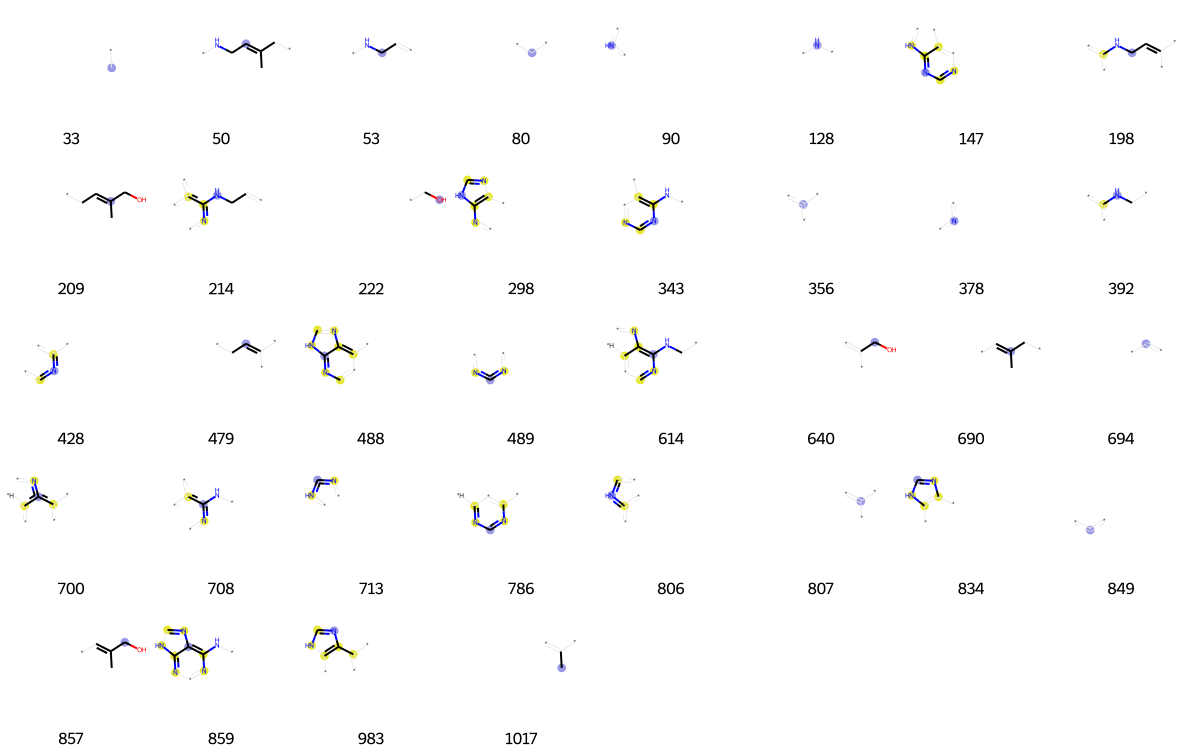

In [1194]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [1195]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[21,
 25,
 77,
 80,
 102,
 114,
 120,
 121,
 150,
 160,
 209,
 219,
 225,
 236,
 276,
 281,
 310,
 322,
 356,
 378,
 383,
 384,
 393,
 428,
 429,
 475,
 489,
 584,
 596,
 641,
 654,
 656,
 665,
 691,
 694,
 695,
 718,
 724,
 726,
 730,
 745,
 747,
 759,
 809,
 813,
 831,
 835,
 842,
 849,
 871,
 878,
 887,
 893,
 904,
 935,
 948,
 978,
 992,
 1009,
 1020]

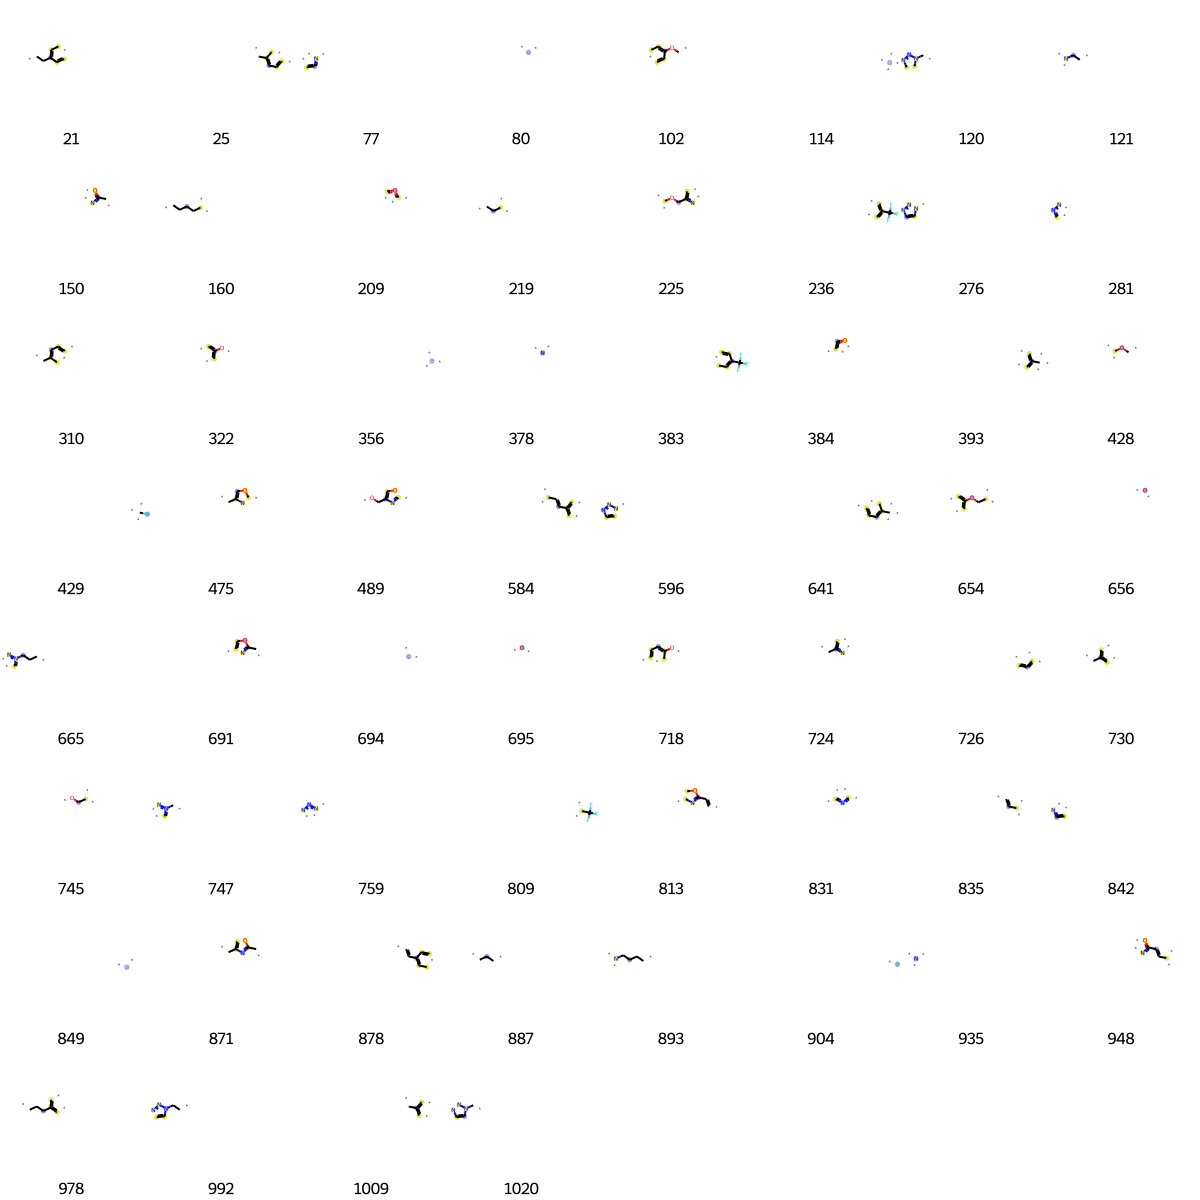

In [1196]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [1197]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[33,
 40,
 54,
 94,
 121,
 136,
 157,
 167,
 249,
 250,
 314,
 356,
 363,
 472,
 501,
 512,
 578,
 580,
 583,
 630,
 650,
 656,
 666,
 695,
 726,
 732,
 745,
 779,
 784,
 807,
 841,
 849,
 875,
 896,
 920,
 946,
 960,
 964,
 992]

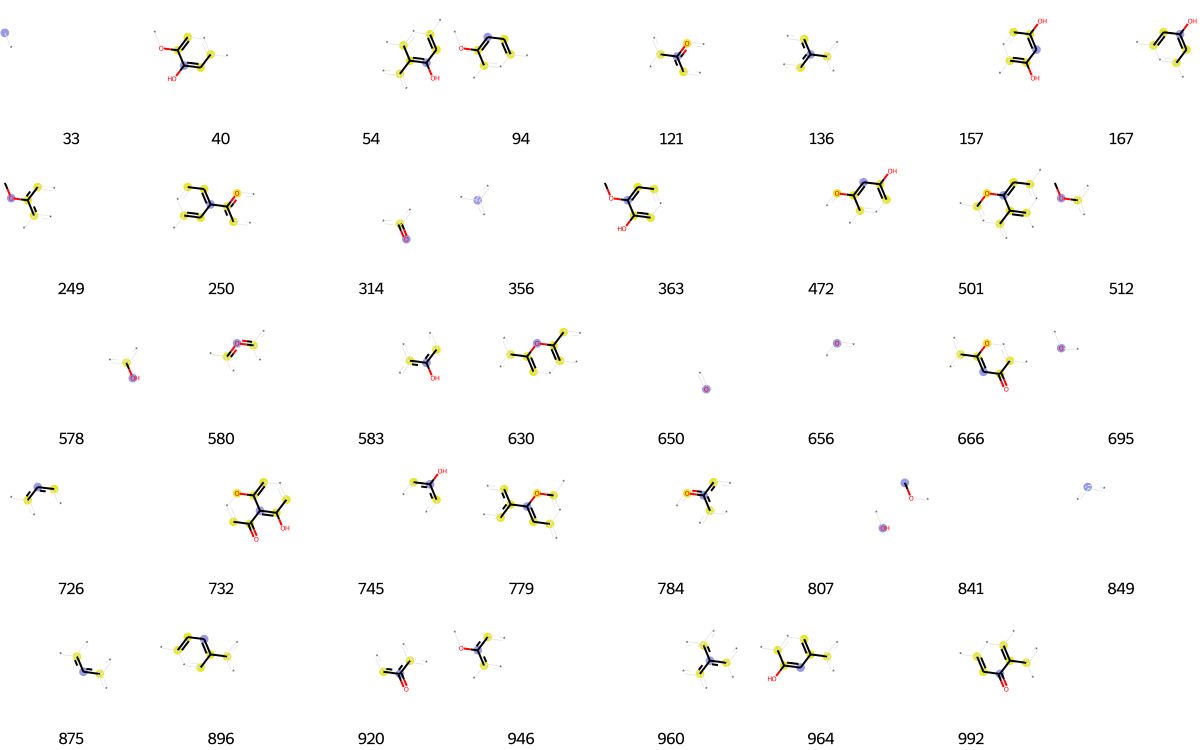

In [1198]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [1199]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[19,
 64,
 80,
 98,
 121,
 136,
 147,
 166,
 250,
 257,
 356,
 378,
 437,
 511,
 532,
 562,
 579,
 580,
 582,
 656,
 724,
 726,
 736,
 842,
 849,
 859,
 910,
 913,
 981]

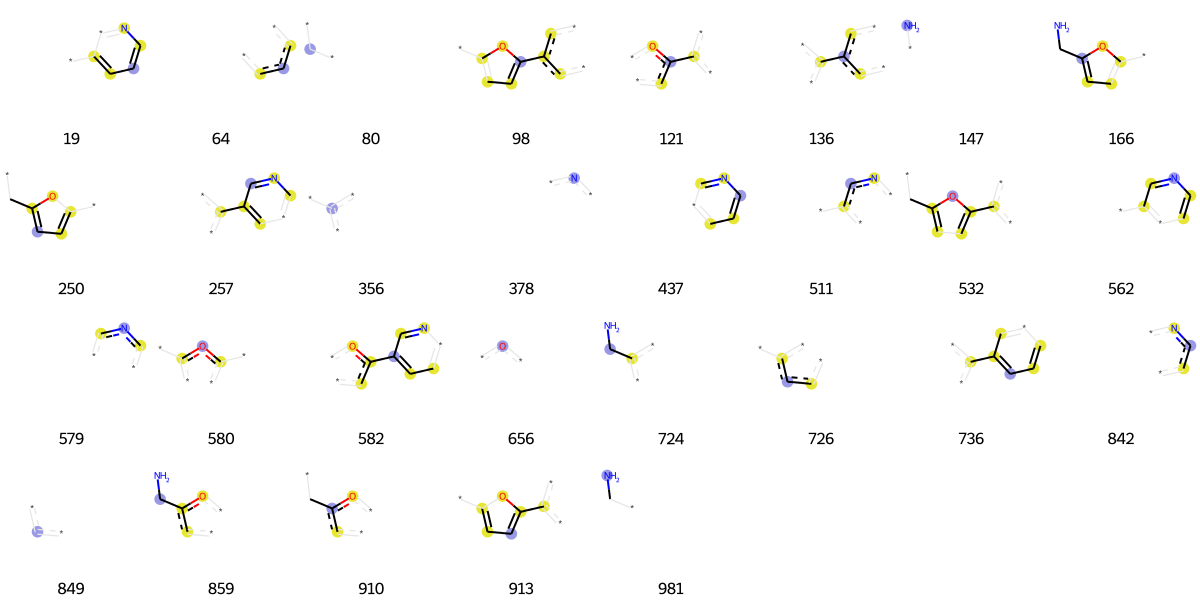

In [1200]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [1201]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[1,
 14,
 33,
 80,
 125,
 128,
 145,
 147,
 197,
 214,
 226,
 231,
 235,
 245,
 269,
 290,
 294,
 339,
 356,
 387,
 434,
 481,
 520,
 590,
 644,
 650,
 654,
 695,
 698,
 707,
 756,
 759,
 786,
 807,
 808,
 849,
 893,
 918,
 926,
 935,
 1017,
 1019]

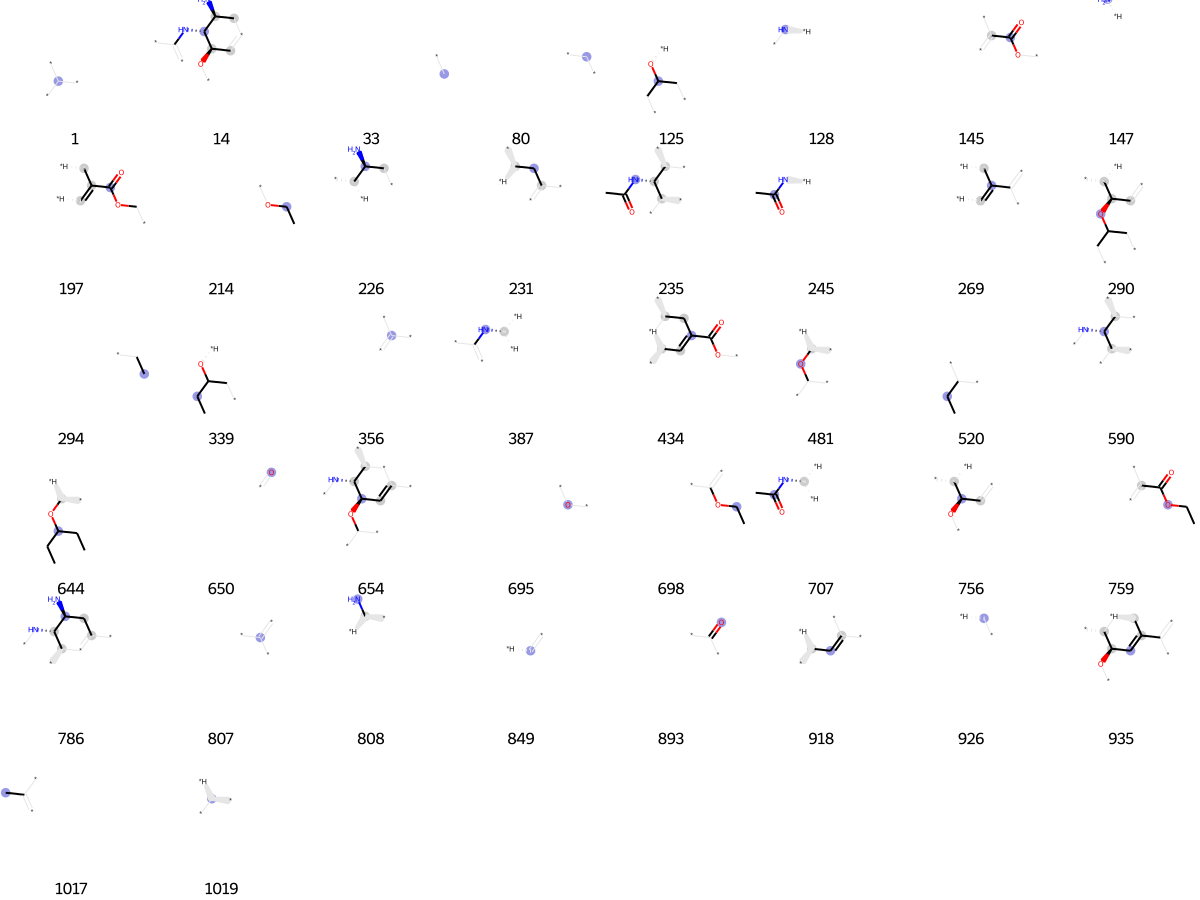

In [1202]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [1203]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[14,
 33,
 53,
 75,
 80,
 121,
 123,
 124,
 128,
 154,
 157,
 161,
 191,
 193,
 204,
 207,
 211,
 212,
 224,
 233,
 249,
 298,
 310,
 342,
 356,
 377,
 378,
 381,
 401,
 407,
 420,
 428,
 429,
 456,
 484,
 489,
 491,
 500,
 507,
 512,
 561,
 579,
 621,
 626,
 650,
 659,
 687,
 694,
 695,
 721,
 726,
 730,
 746,
 783,
 786,
 792,
 801,
 807,
 841,
 843,
 849,
 875,
 881,
 893,
 894,
 926,
 935,
 946,
 959,
 1003,
 1011]

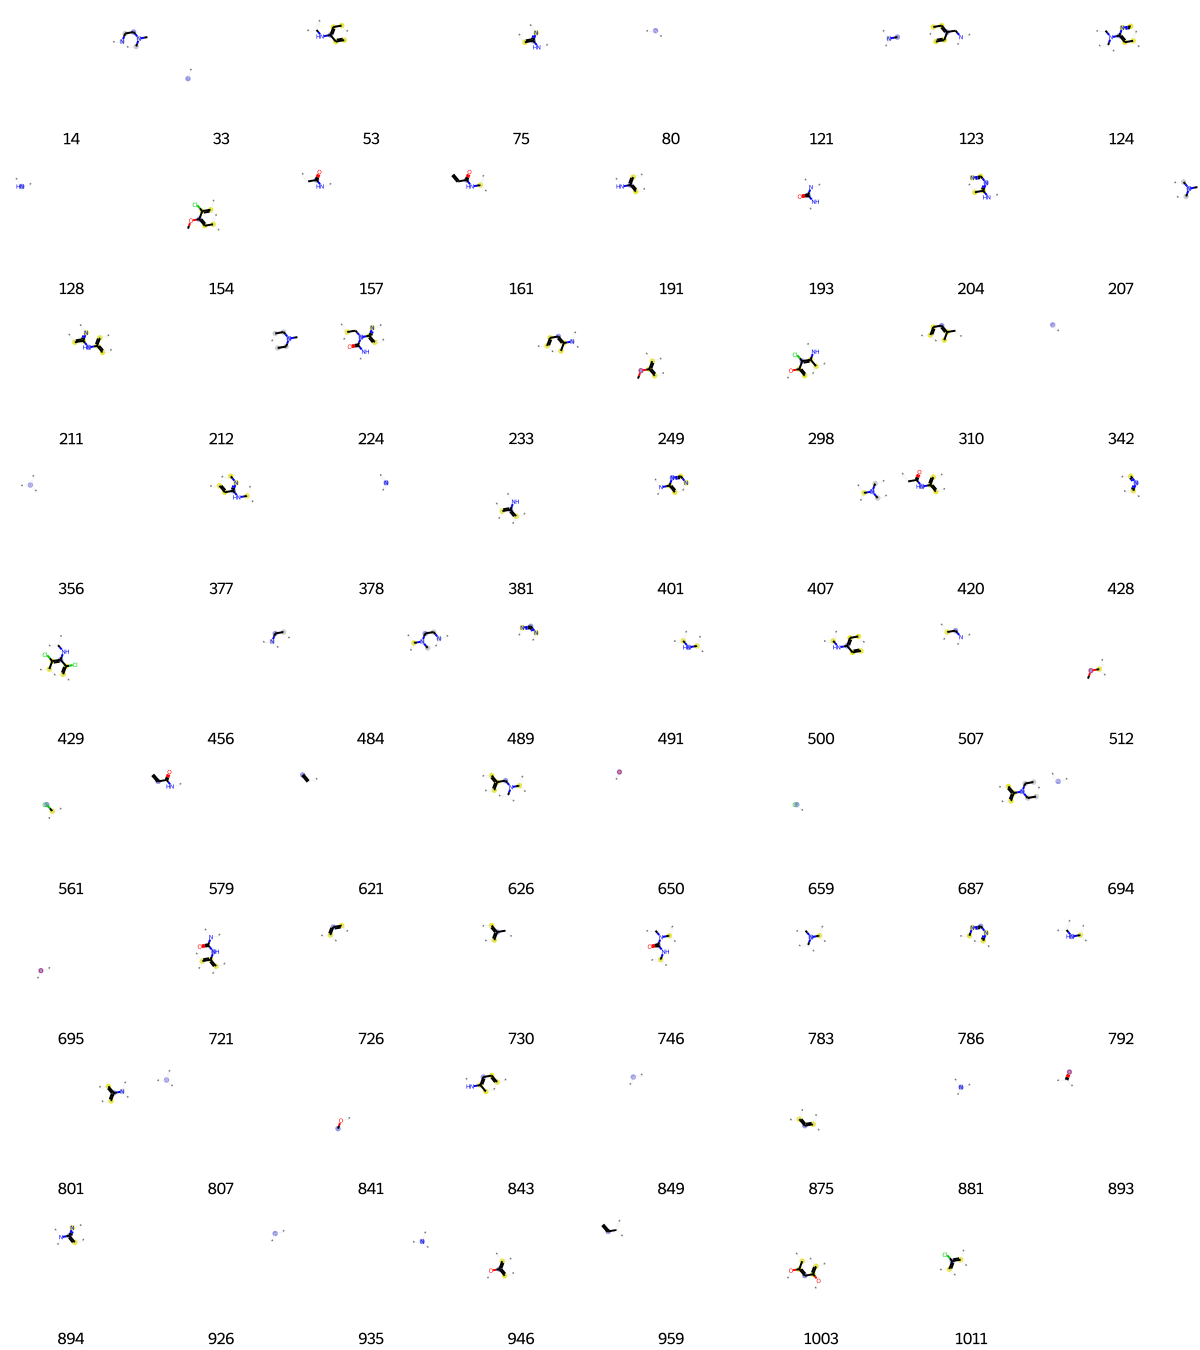

In [1204]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [1205]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[1,
 32,
 33,
 36,
 64,
 70,
 80,
 117,
 120,
 121,
 128,
 138,
 140,
 141,
 171,
 175,
 185,
 204,
 244,
 249,
 251,
 268,
 283,
 290,
 291,
 301,
 335,
 338,
 341,
 353,
 356,
 378,
 384,
 389,
 391,
 441,
 514,
 530,
 557,
 598,
 625,
 650,
 662,
 689,
 698,
 726,
 739,
 807,
 825,
 849,
 886,
 893,
 904,
 917,
 926,
 935,
 974,
 999,
 1019]

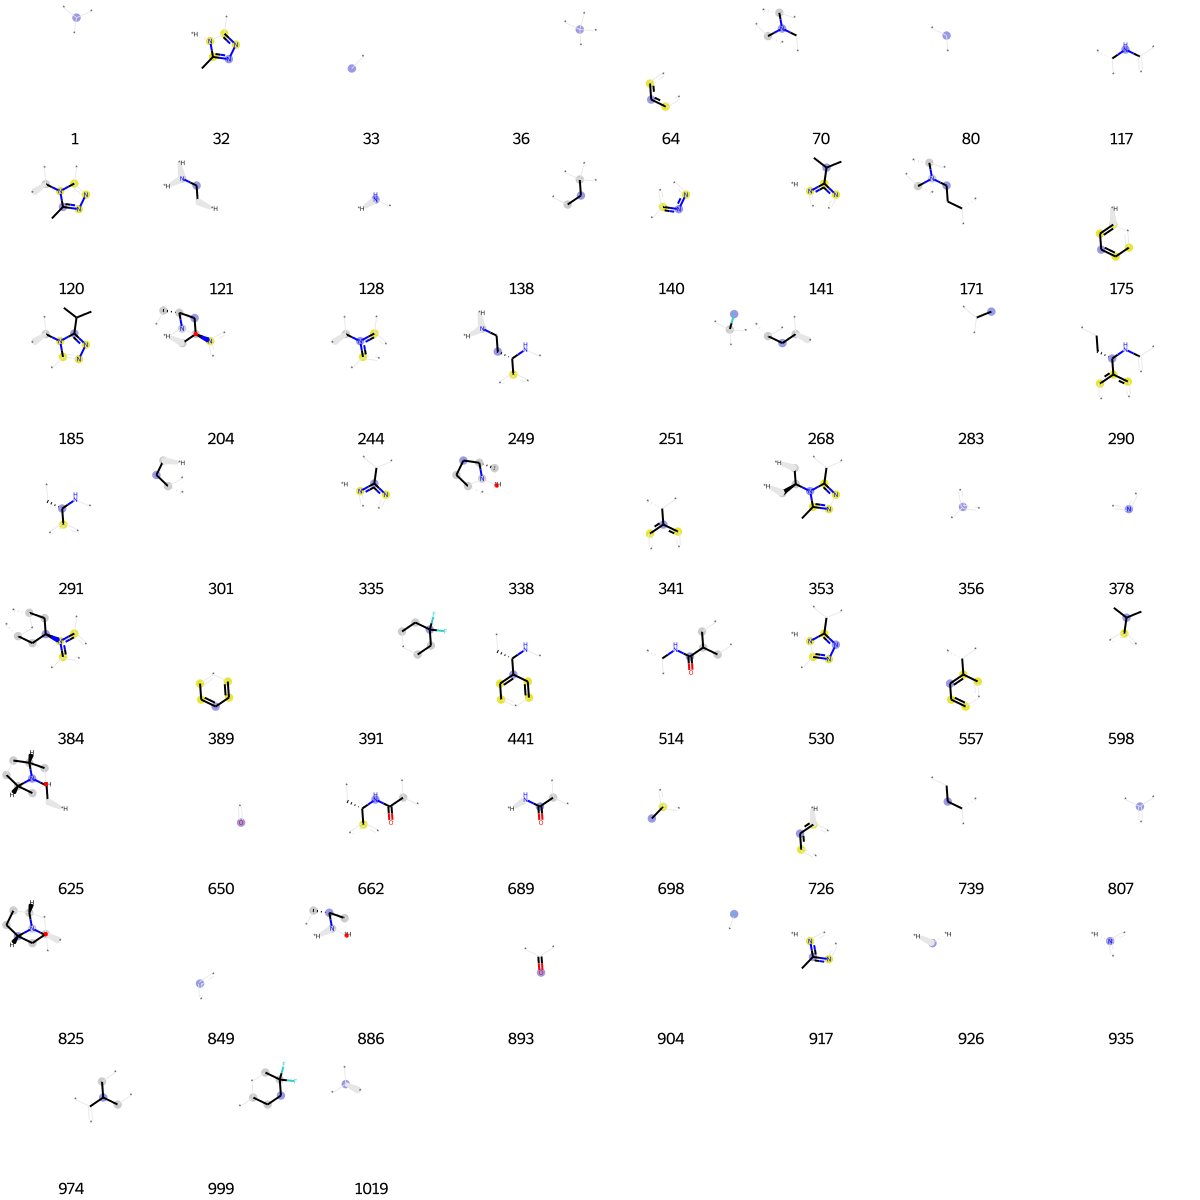

In [1206]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [1207]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[1,
 5,
 83,
 105,
 114,
 236,
 237,
 241,
 297,
 325,
 340,
 341,
 356,
 381,
 383,
 393,
 417,
 429,
 441,
 456,
 461,
 523,
 578,
 583,
 641,
 656,
 726,
 738,
 743,
 776,
 793,
 807,
 809,
 829,
 839,
 849,
 851,
 875,
 881,
 904,
 926,
 935,
 950]

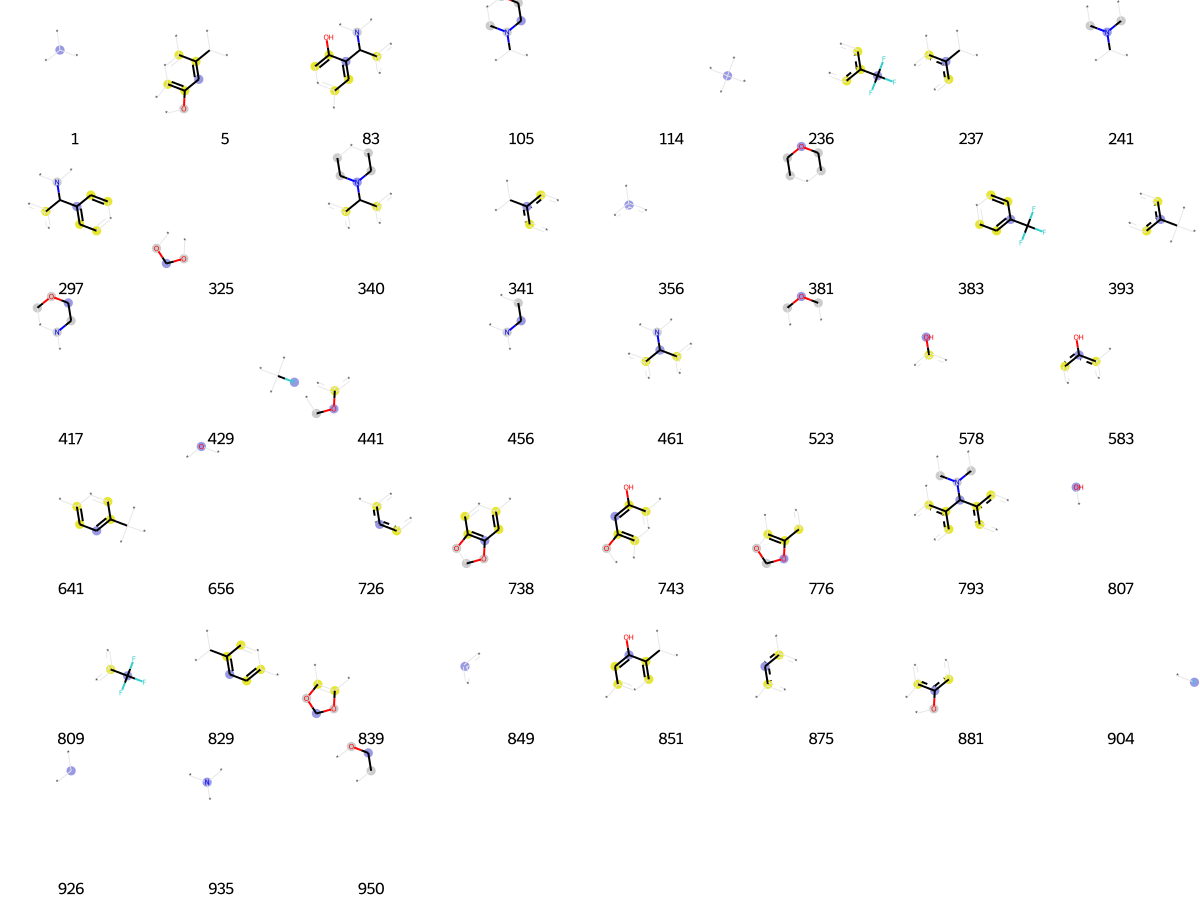

In [1208]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [1209]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[1,
 33,
 42,
 64,
 80,
 86,
 117,
 128,
 147,
 163,
 175,
 238,
 283,
 356,
 381,
 389,
 458,
 508,
 573,
 629,
 635,
 650,
 673,
 680,
 694,
 695,
 726,
 730,
 734,
 736,
 745,
 759,
 807,
 823,
 849,
 890,
 893,
 905,
 953,
 992,
 1004,
 1018]

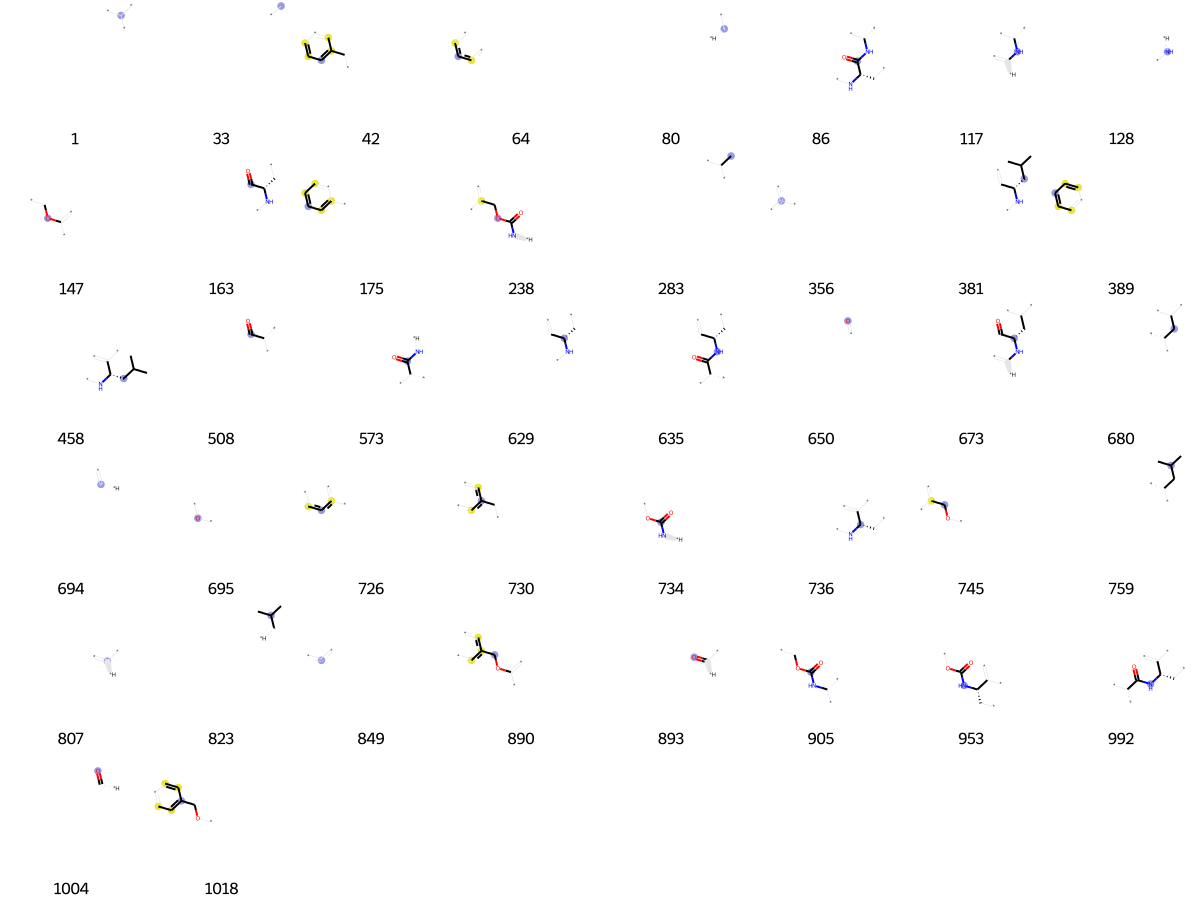

In [1210]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [1211]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[15,
 31,
 33,
 53,
 64,
 80,
 90,
 119,
 128,
 139,
 157,
 173,
 175,
 184,
 191,
 251,
 305,
 323,
 328,
 329,
 332,
 333,
 352,
 356,
 361,
 366,
 378,
 420,
 428,
 439,
 453,
 458,
 486,
 491,
 511,
 544,
 546,
 549,
 558,
 561,
 562,
 600,
 608,
 641,
 650,
 652,
 659,
 673,
 694,
 703,
 721,
 726,
 759,
 771,
 792,
 806,
 807,
 831,
 840,
 843,
 849,
 855,
 875,
 881,
 893,
 894,
 913,
 954,
 961,
 972,
 1015]

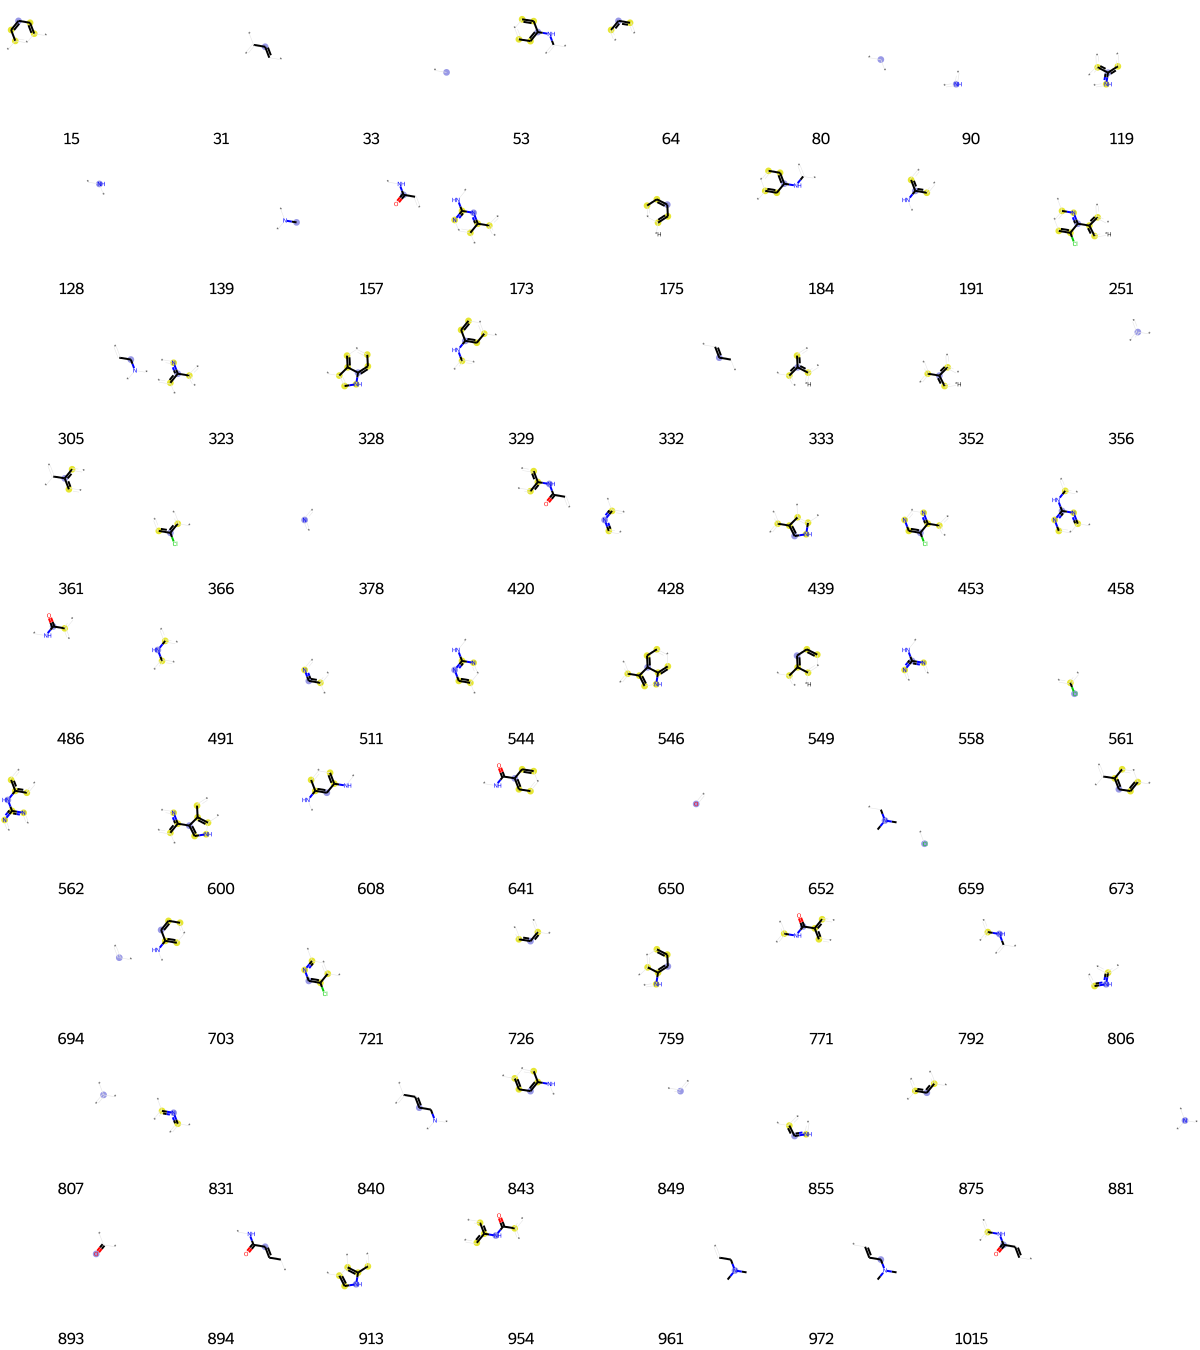

In [1212]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [1213]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[1,
 33,
 41,
 64,
 80,
 102,
 107,
 119,
 147,
 169,
 175,
 221,
 222,
 268,
 278,
 341,
 356,
 380,
 381,
 389,
 396,
 449,
 482,
 557,
 575,
 577,
 601,
 650,
 656,
 658,
 670,
 695,
 721,
 726,
 803,
 807,
 849,
 893,
 897,
 926,
 977,
 1019]

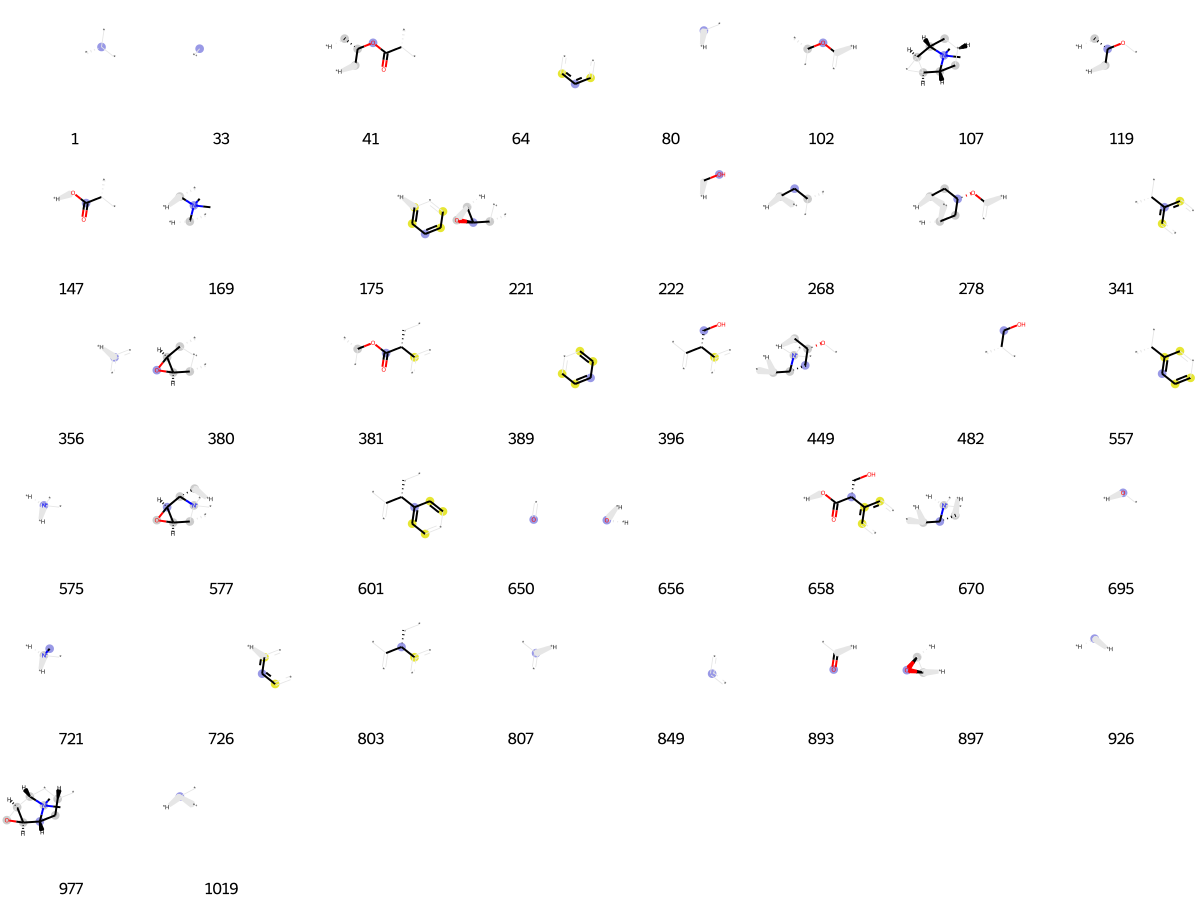

In [1214]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [1215]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[1,
 4,
 21,
 33,
 42,
 64,
 80,
 108,
 128,
 153,
 175,
 193,
 214,
 219,
 242,
 283,
 301,
 354,
 356,
 389,
 407,
 408,
 446,
 456,
 488,
 531,
 559,
 573,
 584,
 600,
 650,
 726,
 730,
 736,
 739,
 807,
 808,
 820,
 849,
 893,
 919,
 926,
 935,
 979,
 989,
 1019]

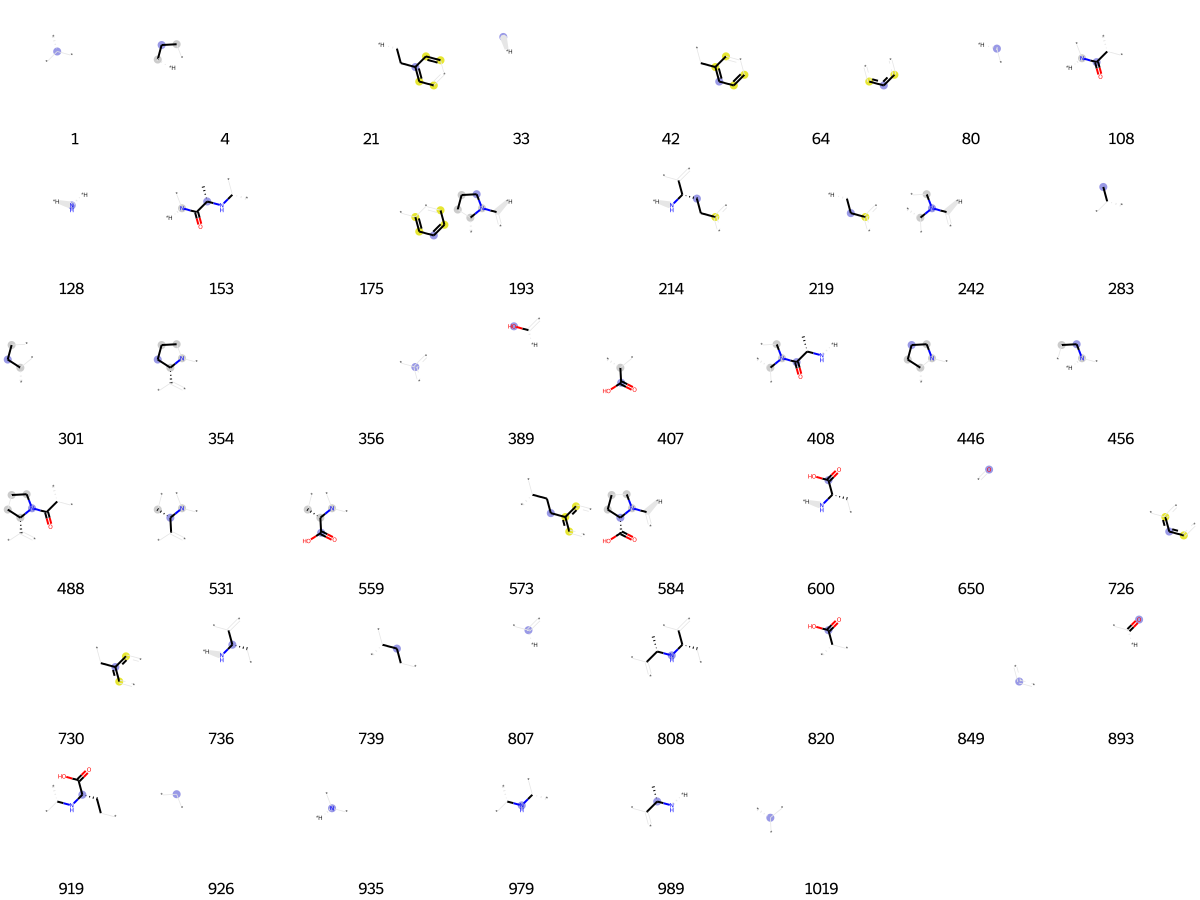

In [1216]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [1217]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[15,
 64,
 90,
 147,
 149,
 218,
 314,
 333,
 356,
 433,
 494,
 527,
 549,
 650,
 658,
 726,
 735,
 750,
 849,
 863,
 892,
 910,
 960]

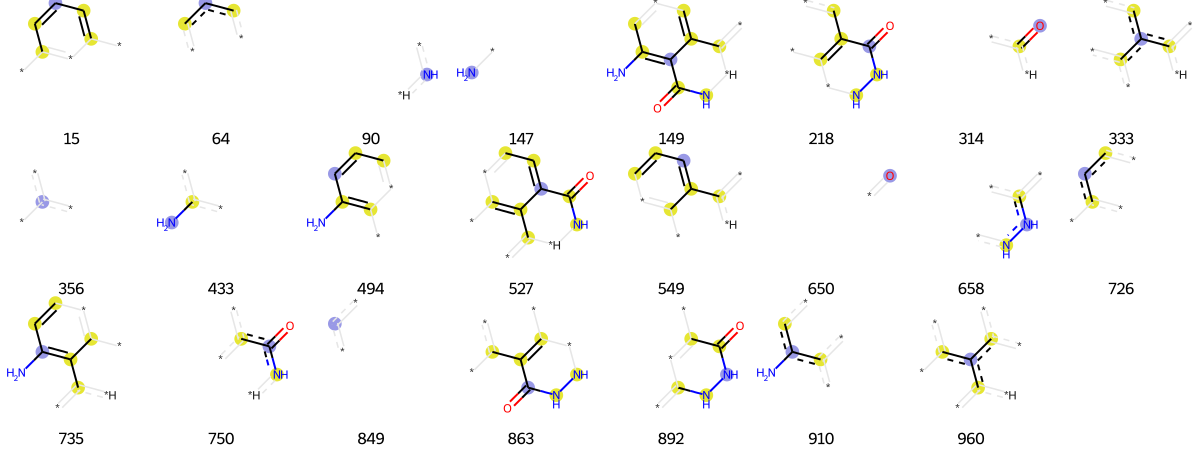

In [1218]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [1219]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[1,
 41,
 42,
 64,
 80,
 128,
 175,
 251,
 257,
 341,
 356,
 362,
 389,
 449,
 493,
 556,
 557,
 607,
 650,
 715,
 726,
 802,
 807,
 849,
 878,
 893,
 955,
 983,
 1001]

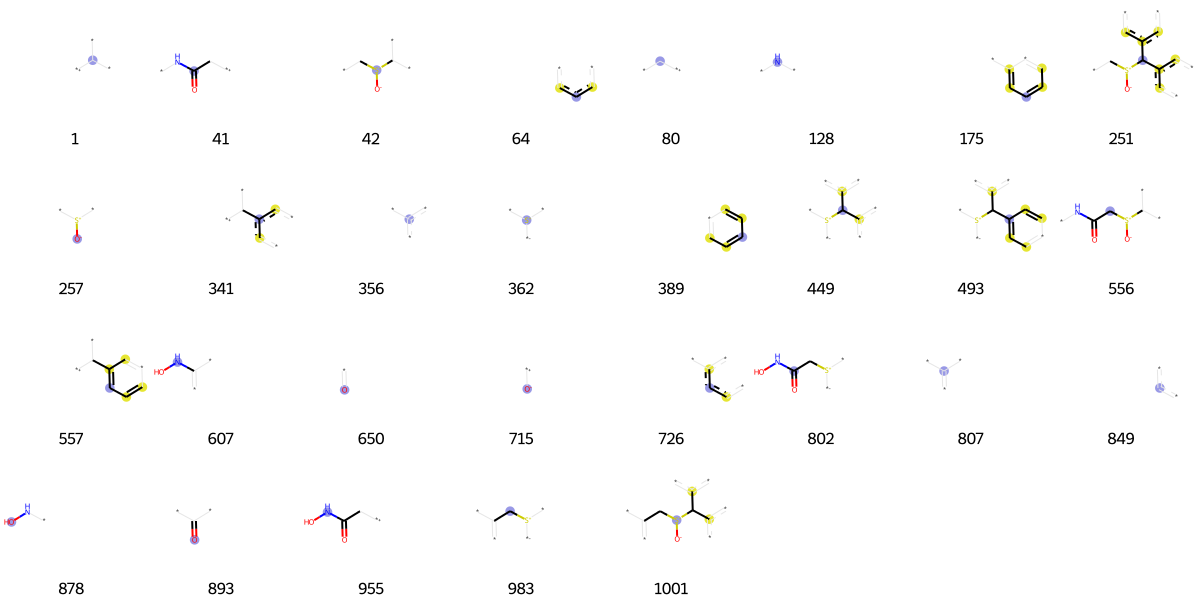

In [1220]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [1221]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[64,
 145,
 175,
 278,
 322,
 356,
 361,
 389,
 556,
 606,
 650,
 695,
 726,
 807,
 849,
 893,
 961]

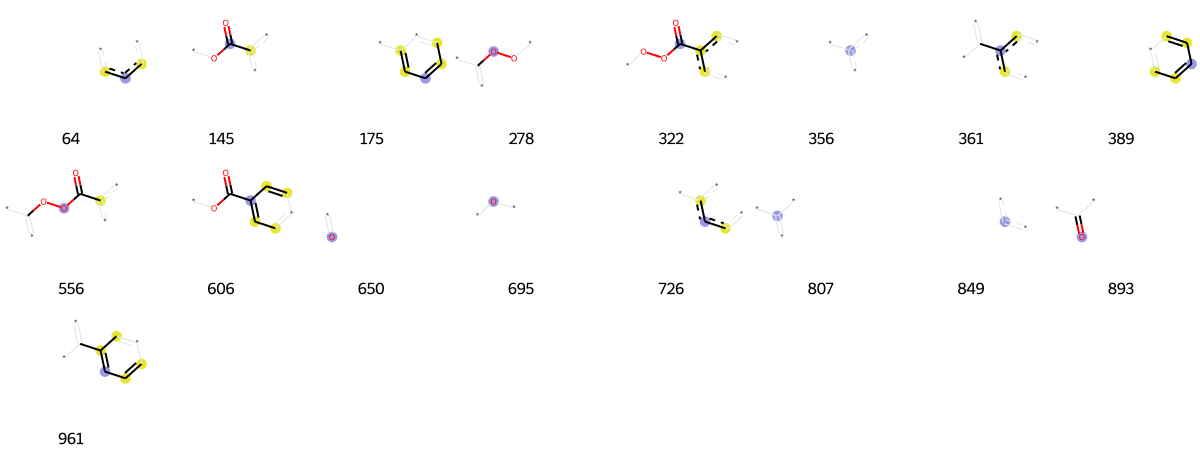

In [1222]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [1223]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[33,
 80,
 86,
 119,
 243,
 263,
 294,
 389,
 420,
 540,
 591,
 650,
 713,
 794,
 807,
 887,
 893]

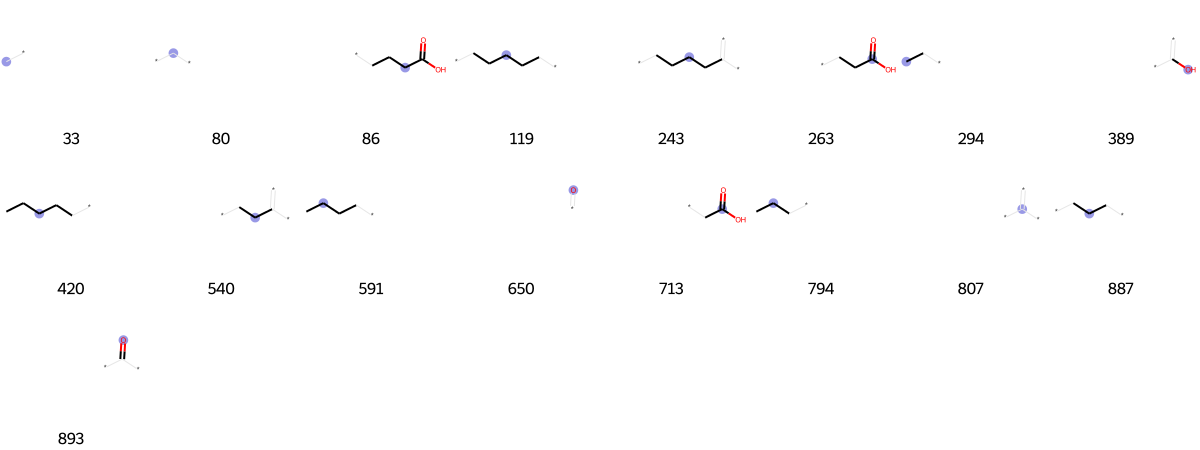

In [1224]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [1225]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[33, 80, 119, 128, 197, 220, 245, 592, 650, 667, 731, 807, 852, 887, 893, 1017]

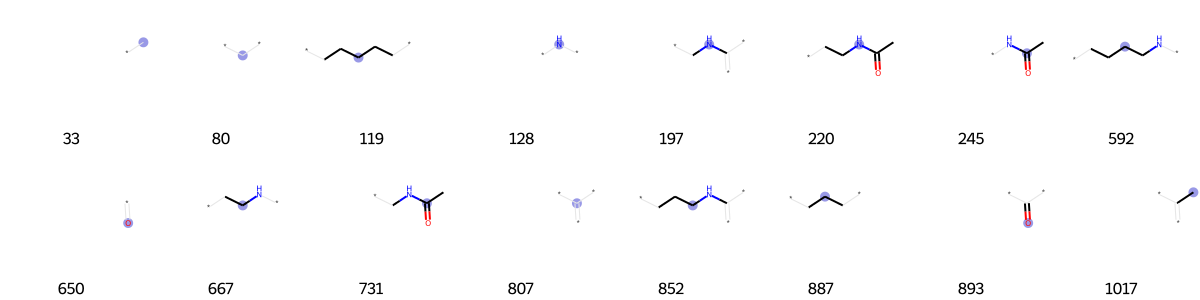

In [1226]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [1227]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[1,
 2,
 4,
 15,
 33,
 47,
 54,
 64,
 69,
 73,
 80,
 90,
 102,
 119,
 123,
 136,
 140,
 145,
 155,
 175,
 201,
 214,
 222,
 237,
 245,
 248,
 257,
 263,
 283,
 289,
 294,
 301,
 310,
 335,
 352,
 356,
 361,
 378,
 386,
 416,
 423,
 428,
 450,
 461,
 466,
 499,
 527,
 561,
 569,
 582,
 650,
 659,
 662,
 695,
 726,
 730,
 741,
 746,
 802,
 807,
 831,
 847,
 849,
 873,
 890,
 893,
 896,
 897,
 922,
 926,
 935,
 967,
 980,
 984,
 1000,
 1019]

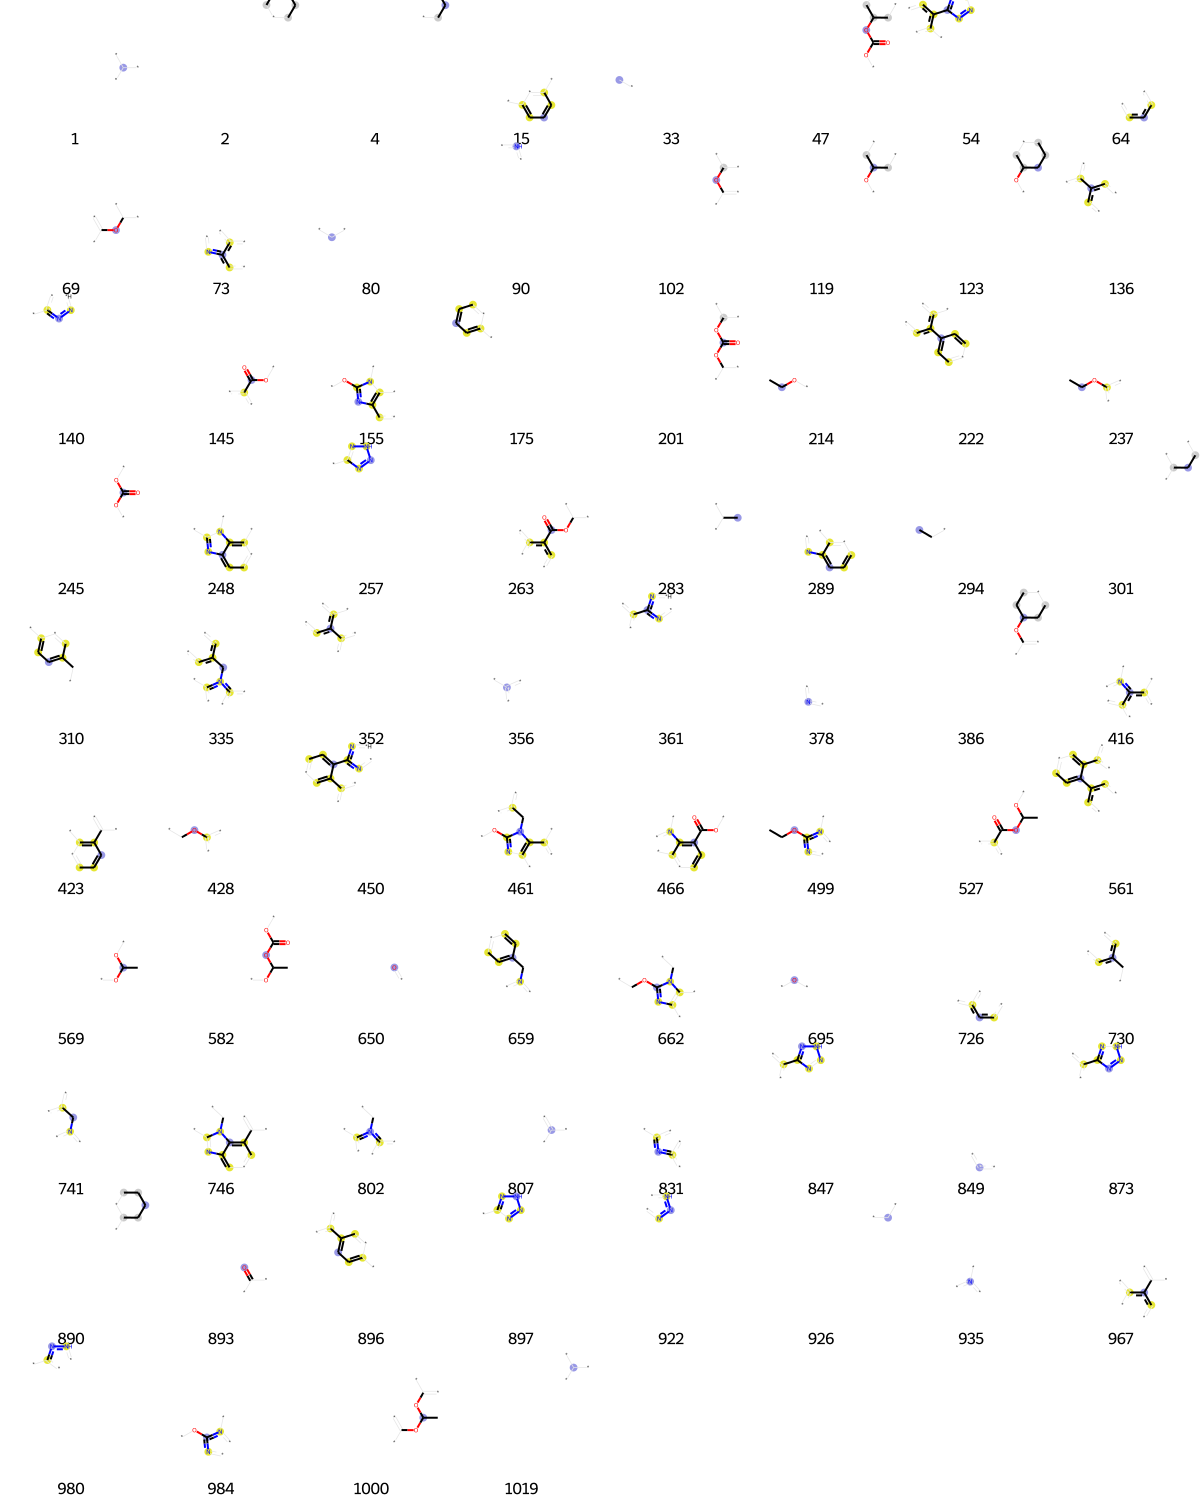

In [1228]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [1229]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[19,
 41,
 80,
 116,
 128,
 157,
 165,
 225,
 283,
 301,
 314,
 356,
 377,
 385,
 387,
 389,
 396,
 421,
 429,
 552,
 650,
 675,
 713,
 762,
 789,
 807,
 883,
 893,
 926,
 935,
 953,
 976,
 1019]

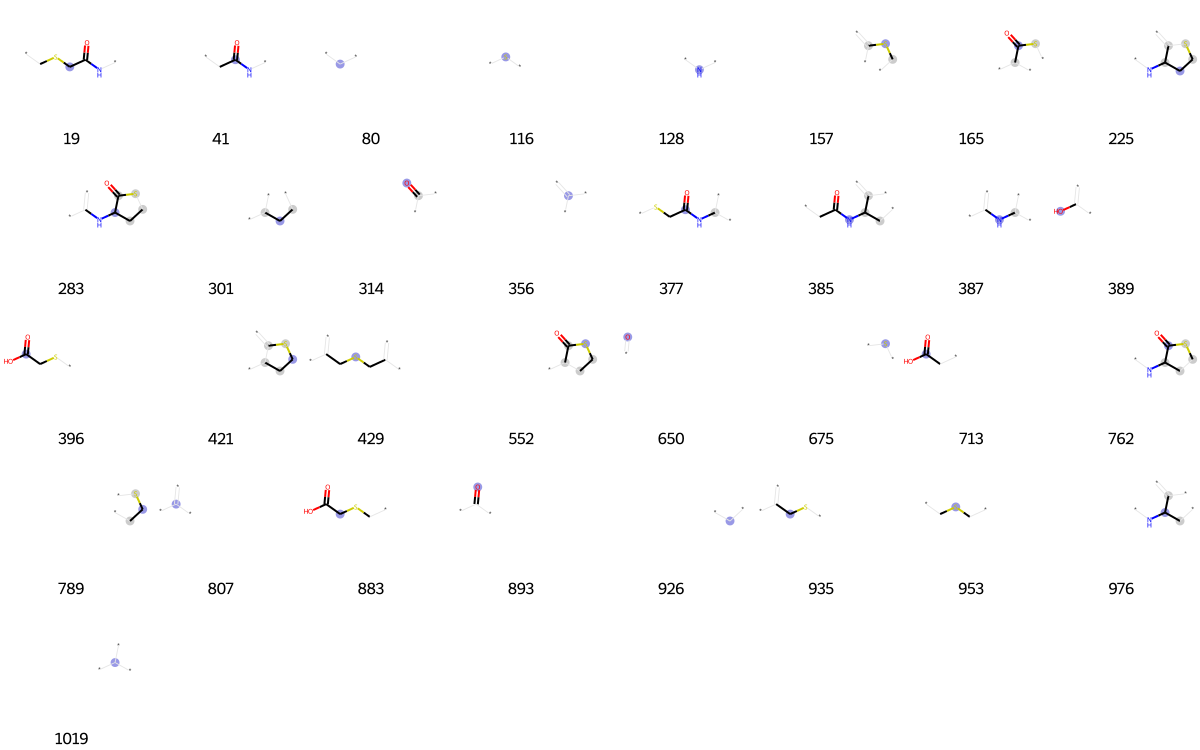

In [1230]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [1231]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[4,
 31,
 33,
 36,
 55,
 138,
 173,
 250,
 259,
 264,
 295,
 325,
 356,
 432,
 444,
 491,
 500,
 552,
 602,
 618,
 642,
 694,
 698,
 714,
 718,
 803,
 807,
 835,
 926,
 932,
 933,
 953,
 1017]

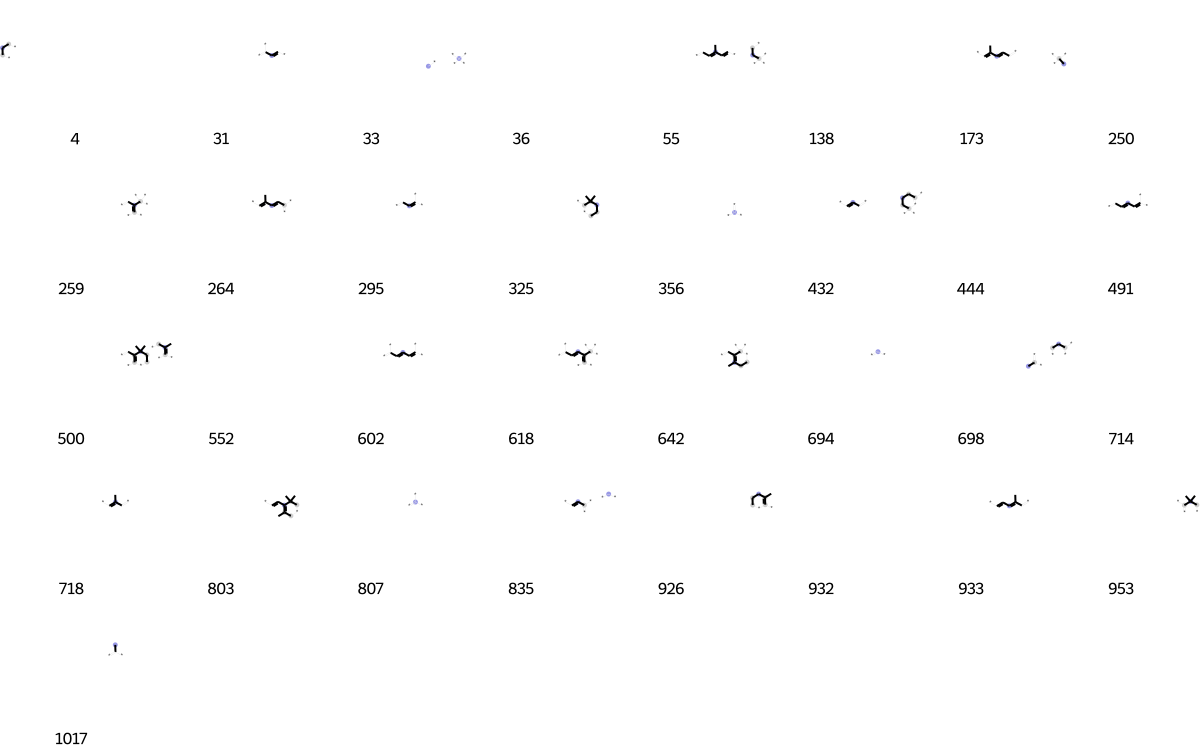

In [1232]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [1233]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[4,
 53,
 80,
 147,
 222,
 233,
 240,
 268,
 314,
 356,
 378,
 433,
 435,
 439,
 464,
 488,
 492,
 569,
 577,
 601,
 606,
 610,
 650,
 656,
 699,
 740,
 795,
 807,
 816,
 831,
 849,
 863,
 896,
 897,
 904,
 926,
 935,
 966,
 989,
 1019]

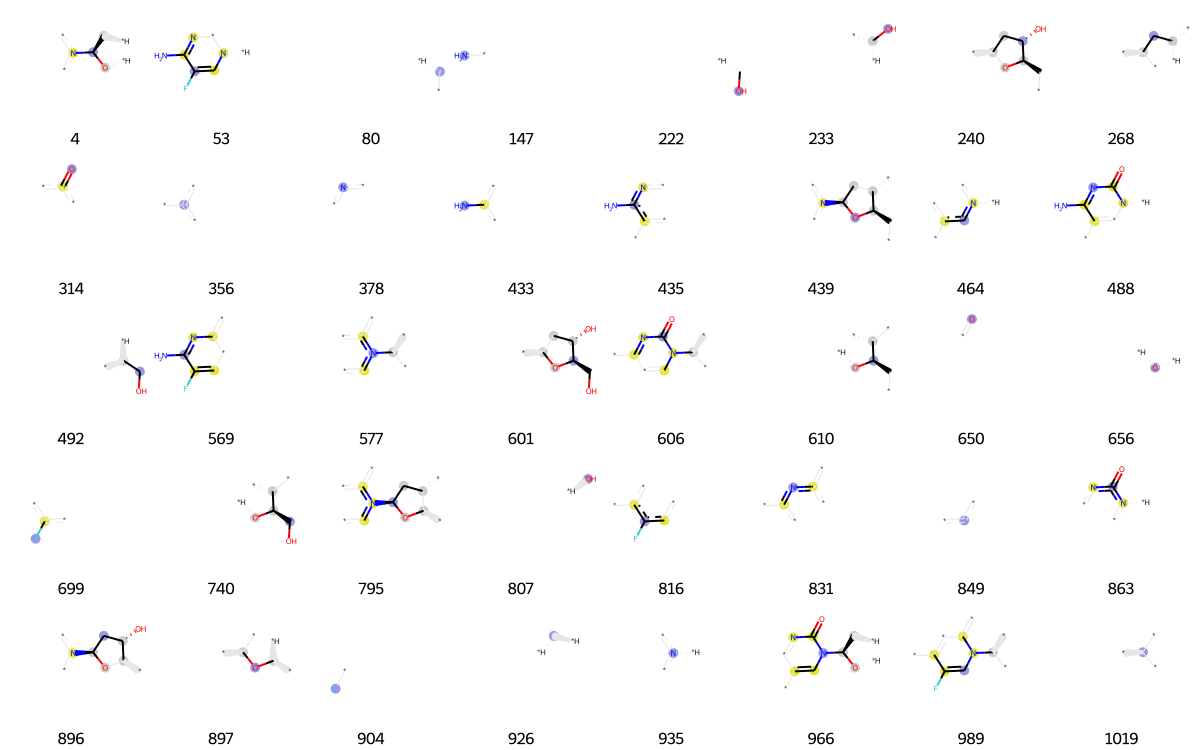

In [1234]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [1235]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[1,
 4,
 33,
 80,
 102,
 118,
 128,
 140,
 147,
 169,
 227,
 235,
 283,
 310,
 322,
 325,
 356,
 421,
 428,
 430,
 550,
 606,
 650,
 658,
 695,
 718,
 726,
 730,
 782,
 791,
 807,
 849,
 874,
 893,
 913,
 1006,
 1014]

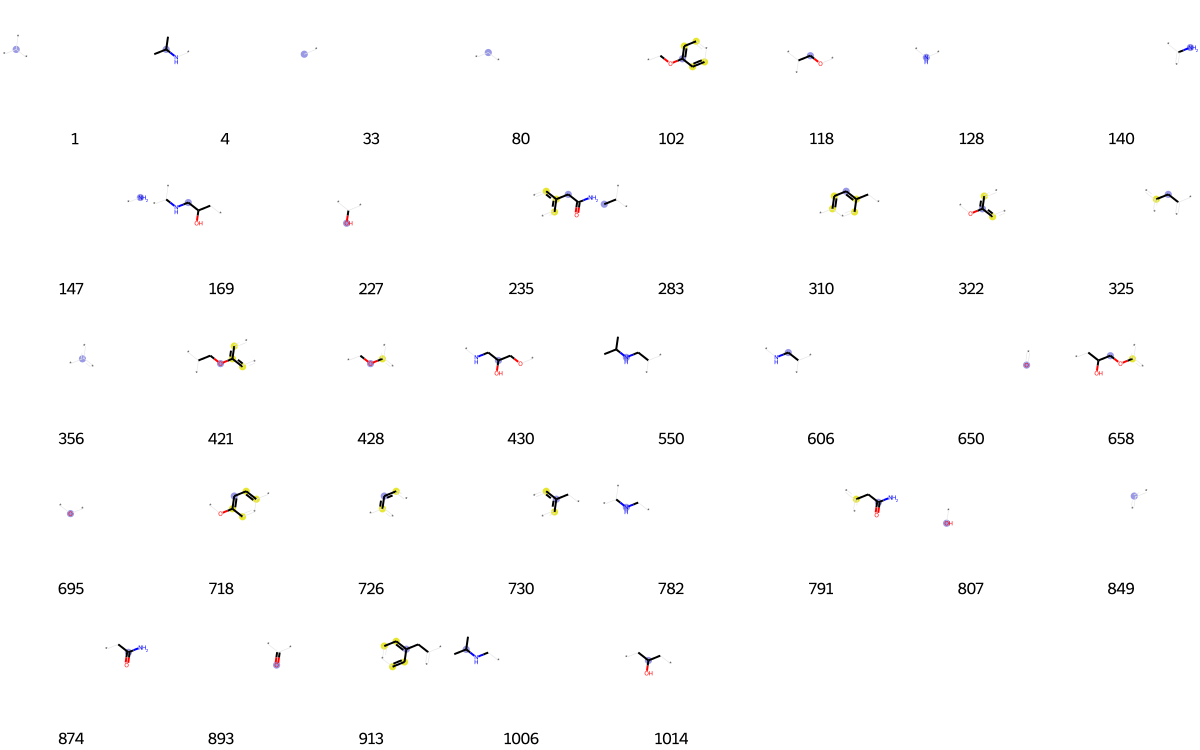

In [1236]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [1237]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[1,
 8,
 33,
 80,
 119,
 121,
 122,
 128,
 179,
 200,
 222,
 227,
 314,
 343,
 351,
 356,
 378,
 381,
 421,
 428,
 429,
 431,
 459,
 470,
 473,
 475,
 482,
 491,
 504,
 513,
 564,
 570,
 650,
 661,
 672,
 699,
 701,
 726,
 771,
 807,
 816,
 832,
 849,
 875,
 891,
 898,
 904,
 914,
 932,
 935,
 947,
 953,
 960,
 989,
 1014]

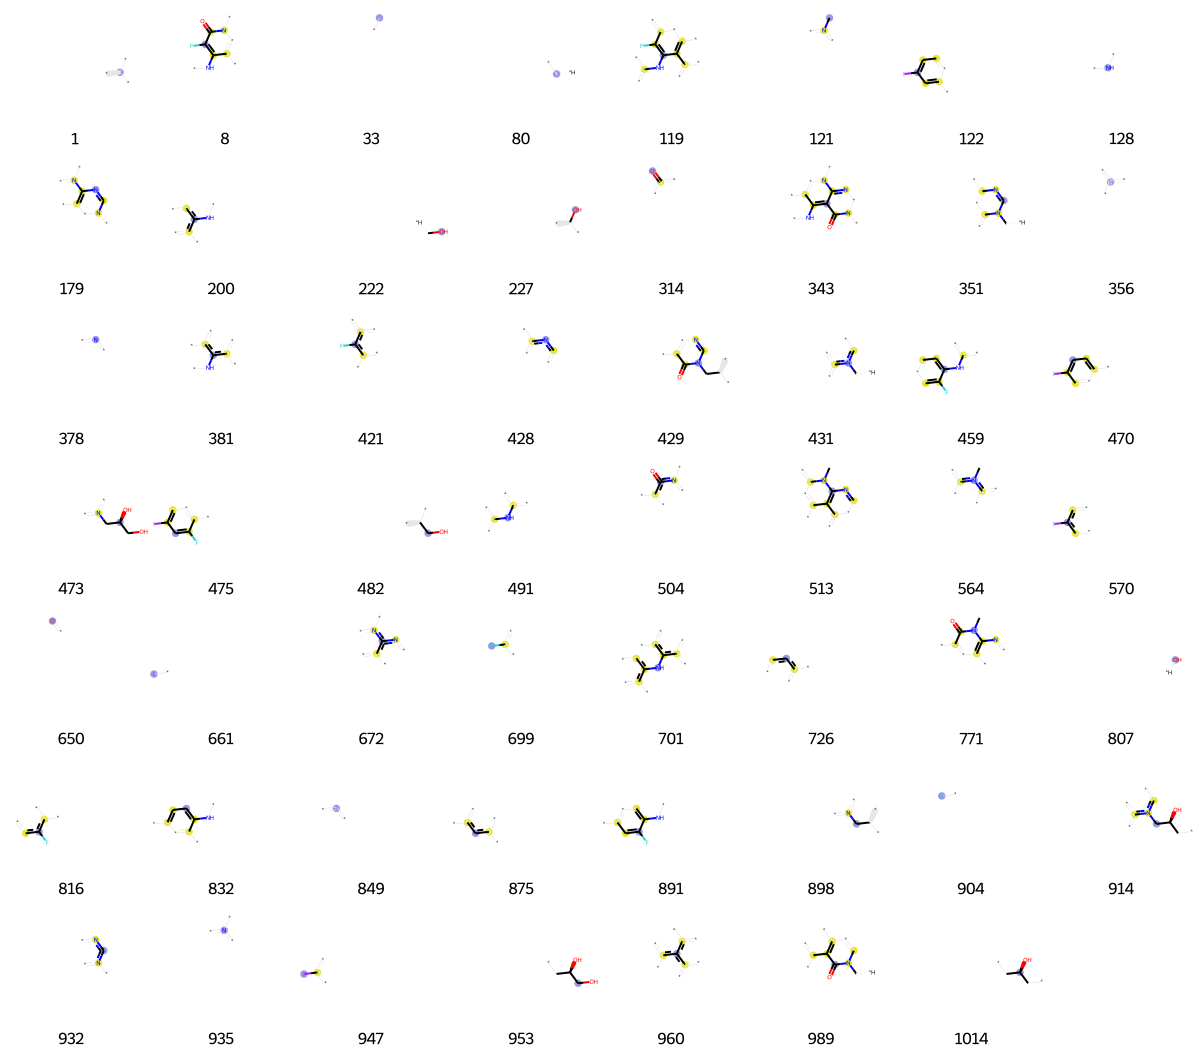

In [1238]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [1239]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[1,
 80,
 86,
 90,
 102,
 105,
 112,
 119,
 266,
 275,
 305,
 310,
 333,
 352,
 356,
 360,
 372,
 378,
 381,
 386,
 417,
 428,
 456,
 511,
 523,
 578,
 656,
 674,
 721,
 723,
 726,
 730,
 741,
 747,
 763,
 767,
 784,
 790,
 791,
 807,
 825,
 849,
 875,
 885,
 915,
 926,
 930,
 935,
 950,
 951,
 980]

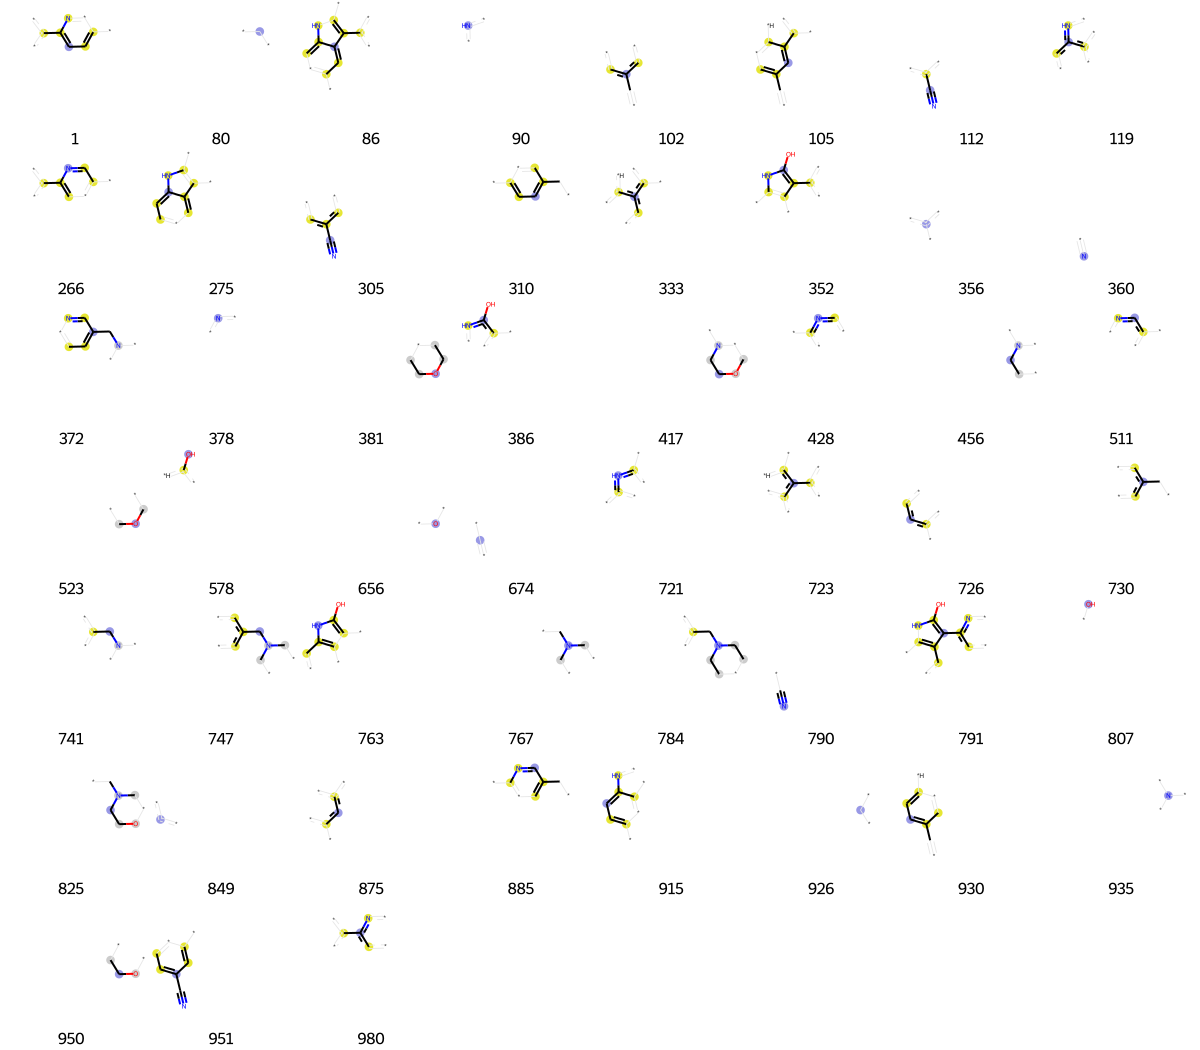

In [1240]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [1241]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[32,
 33,
 41,
 46,
 49,
 80,
 106,
 128,
 136,
 140,
 161,
 168,
 197,
 216,
 271,
 294,
 309,
 322,
 326,
 352,
 356,
 378,
 383,
 482,
 512,
 547,
 561,
 574,
 576,
 582,
 600,
 650,
 659,
 681,
 686,
 695,
 698,
 702,
 718,
 724,
 726,
 781,
 807,
 816,
 841,
 849,
 875,
 885,
 891,
 893,
 896,
 917,
 935,
 948,
 953,
 969,
 1004,
 1019]

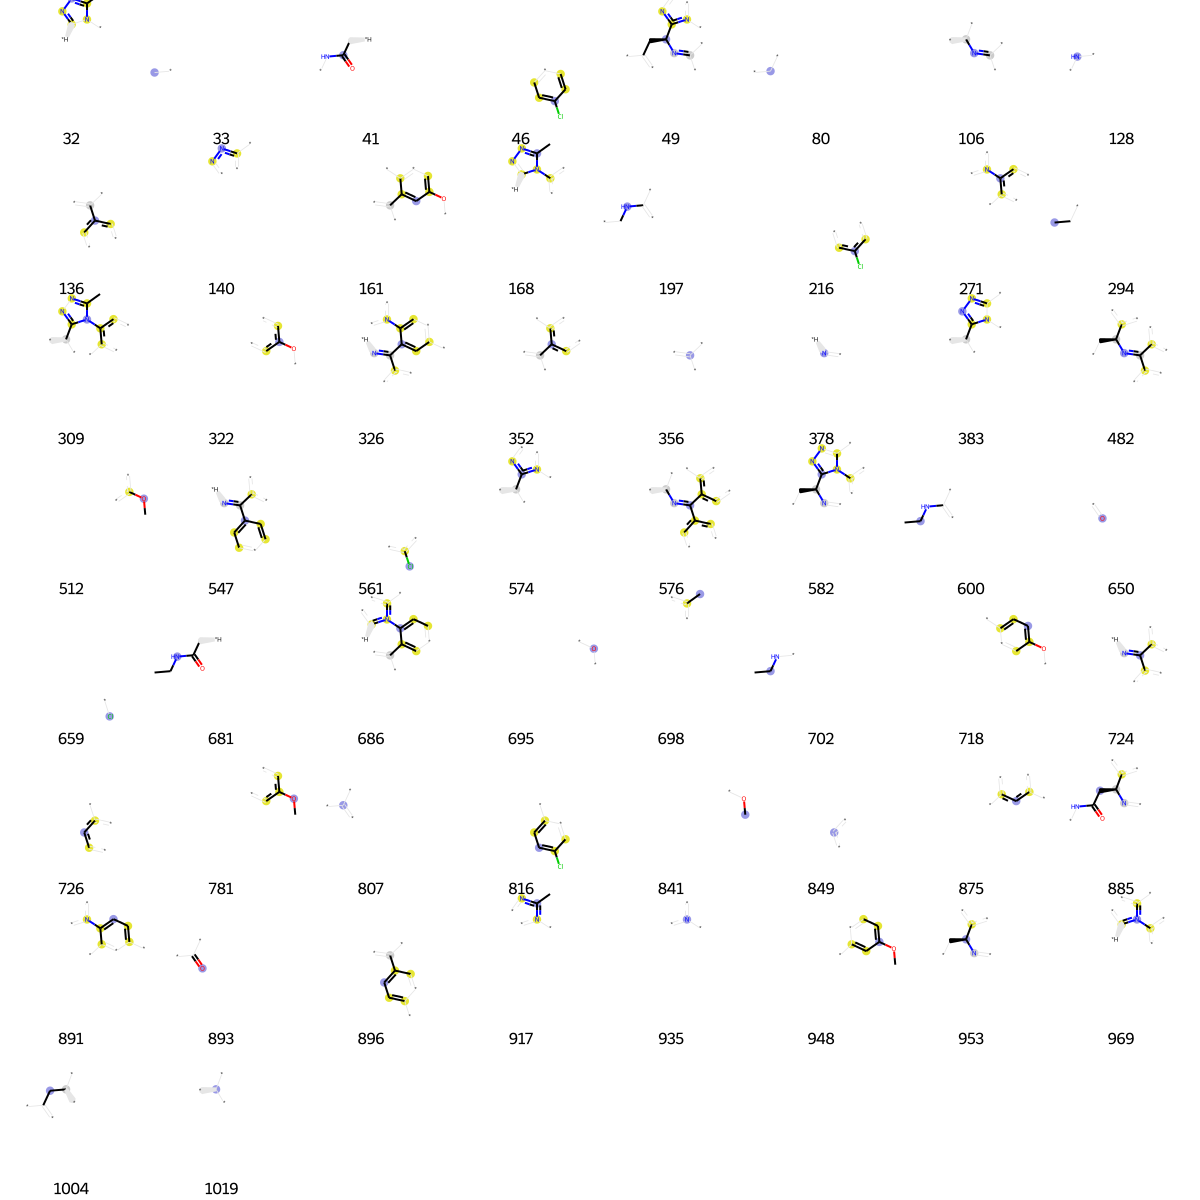

In [1242]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [1243]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[16,
 32,
 33,
 41,
 46,
 49,
 53,
 80,
 106,
 128,
 133,
 136,
 140,
 162,
 168,
 191,
 216,
 241,
 252,
 289,
 313,
 356,
 378,
 383,
 428,
 469,
 482,
 547,
 561,
 574,
 578,
 582,
 629,
 650,
 659,
 675,
 698,
 710,
 723,
 724,
 726,
 745,
 754,
 792,
 807,
 816,
 820,
 834,
 843,
 849,
 885,
 893,
 896,
 901,
 917,
 935,
 953,
 969,
 1004,
 1019]

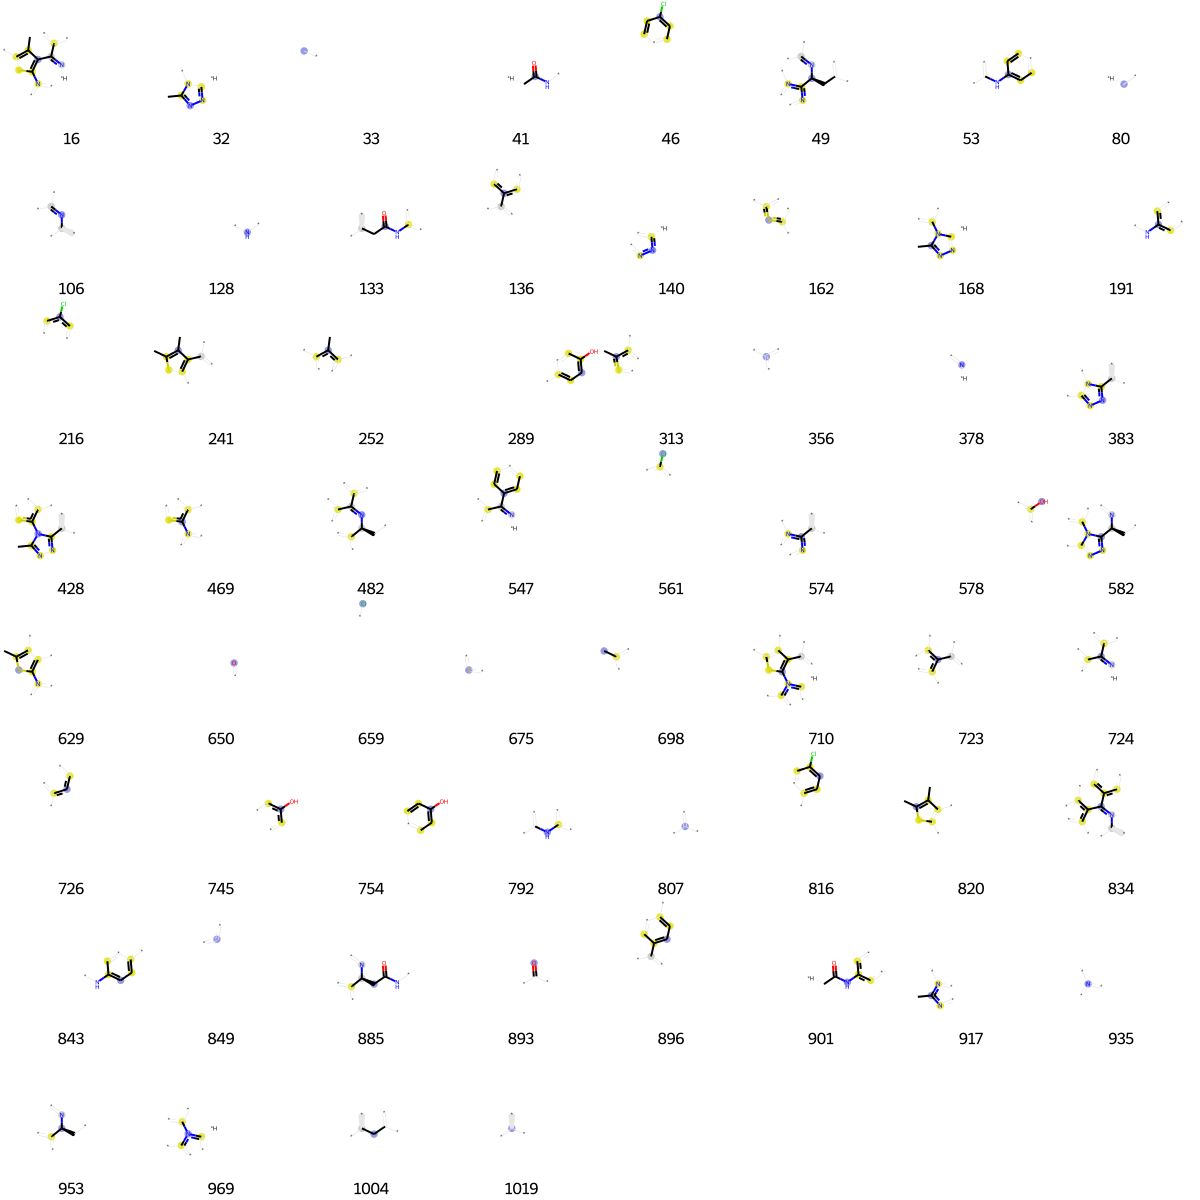

In [1244]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [1245]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[14,
 33,
 80,
 93,
 128,
 145,
 147,
 162,
 214,
 252,
 294,
 302,
 342,
 356,
 367,
 486,
 499,
 543,
 553,
 554,
 615,
 650,
 675,
 695,
 698,
 726,
 759,
 773,
 781,
 792,
 804,
 807,
 824,
 837,
 849,
 875,
 881,
 893,
 942]

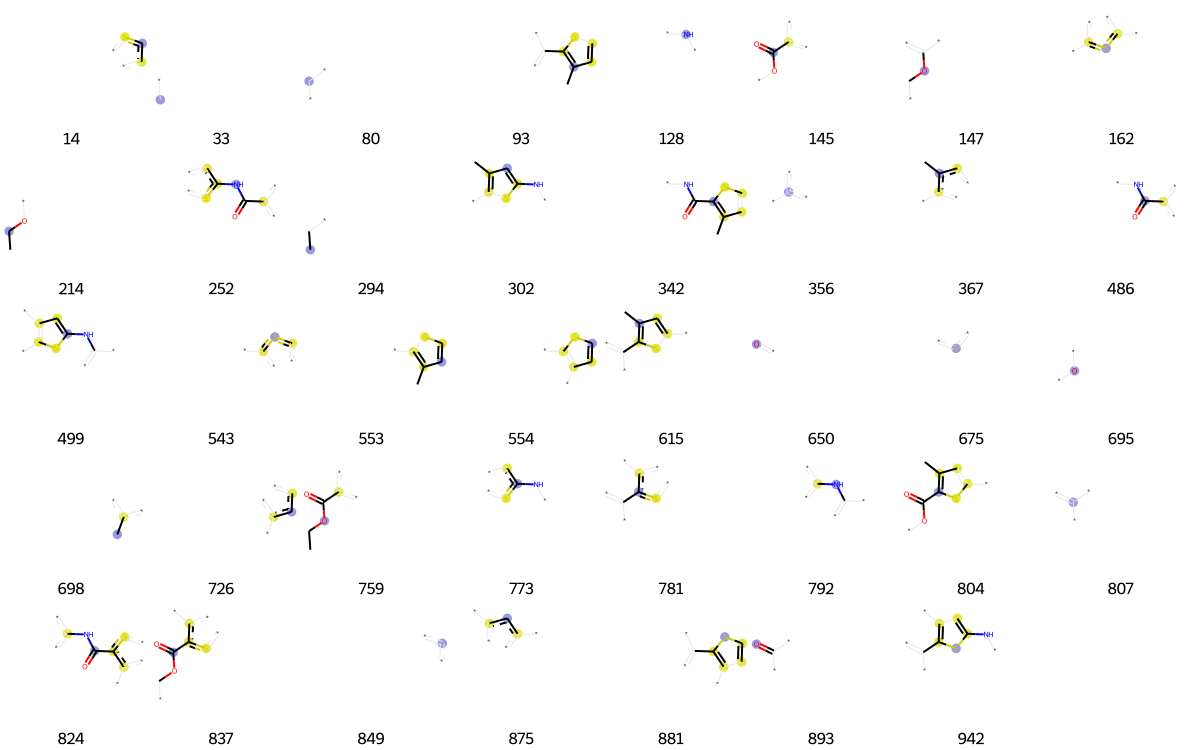

In [1246]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [1247]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[27,
 33,
 41,
 42,
 54,
 59,
 64,
 80,
 102,
 114,
 128,
 147,
 175,
 316,
 322,
 354,
 356,
 389,
 392,
 393,
 562,
 647,
 650,
 726,
 730,
 807,
 849,
 888,
 893,
 918,
 981,
 993]

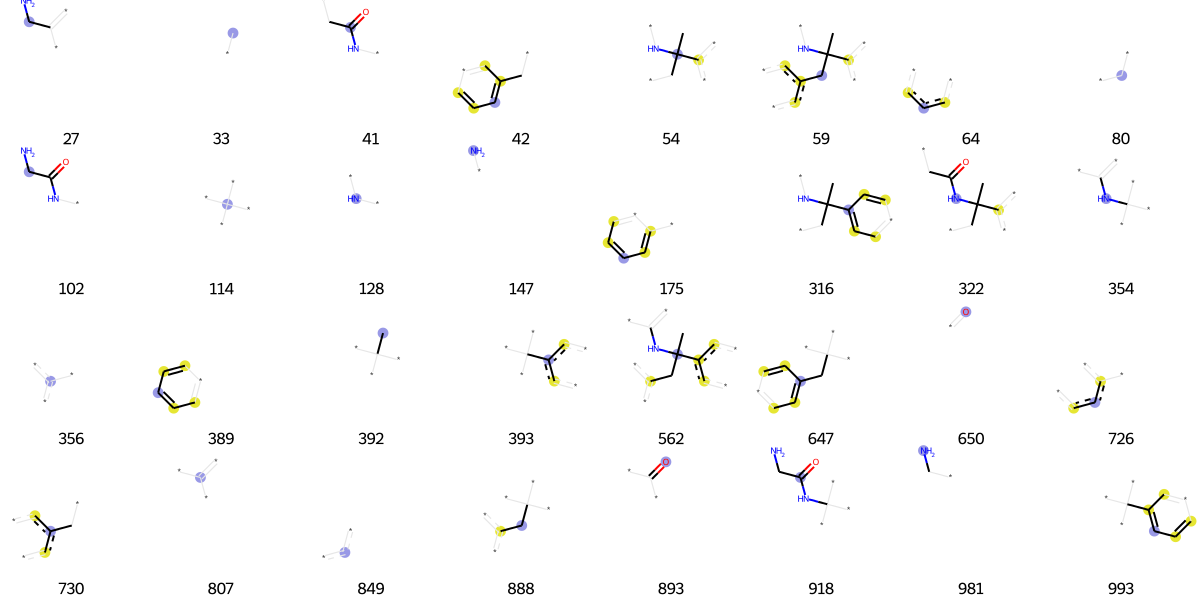

In [1248]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [1249]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 14,
 17,
 33,
 36,
 64,
 73,
 74,
 80,
 90,
 102,
 117,
 124,
 128,
 131,
 139,
 171,
 175,
 207,
 214,
 218,
 250,
 291,
 300,
 339,
 341,
 344,
 348,
 356,
 361,
 378,
 389,
 441,
 447,
 491,
 541,
 543,
 554,
 557,
 568,
 583,
 616,
 650,
 652,
 675,
 698,
 708,
 726,
 731,
 738,
 751,
 807,
 825,
 831,
 836,
 844,
 849,
 859,
 875,
 881,
 893,
 922,
 926,
 935,
 941,
 943,
 980,
 1001,
 1008]

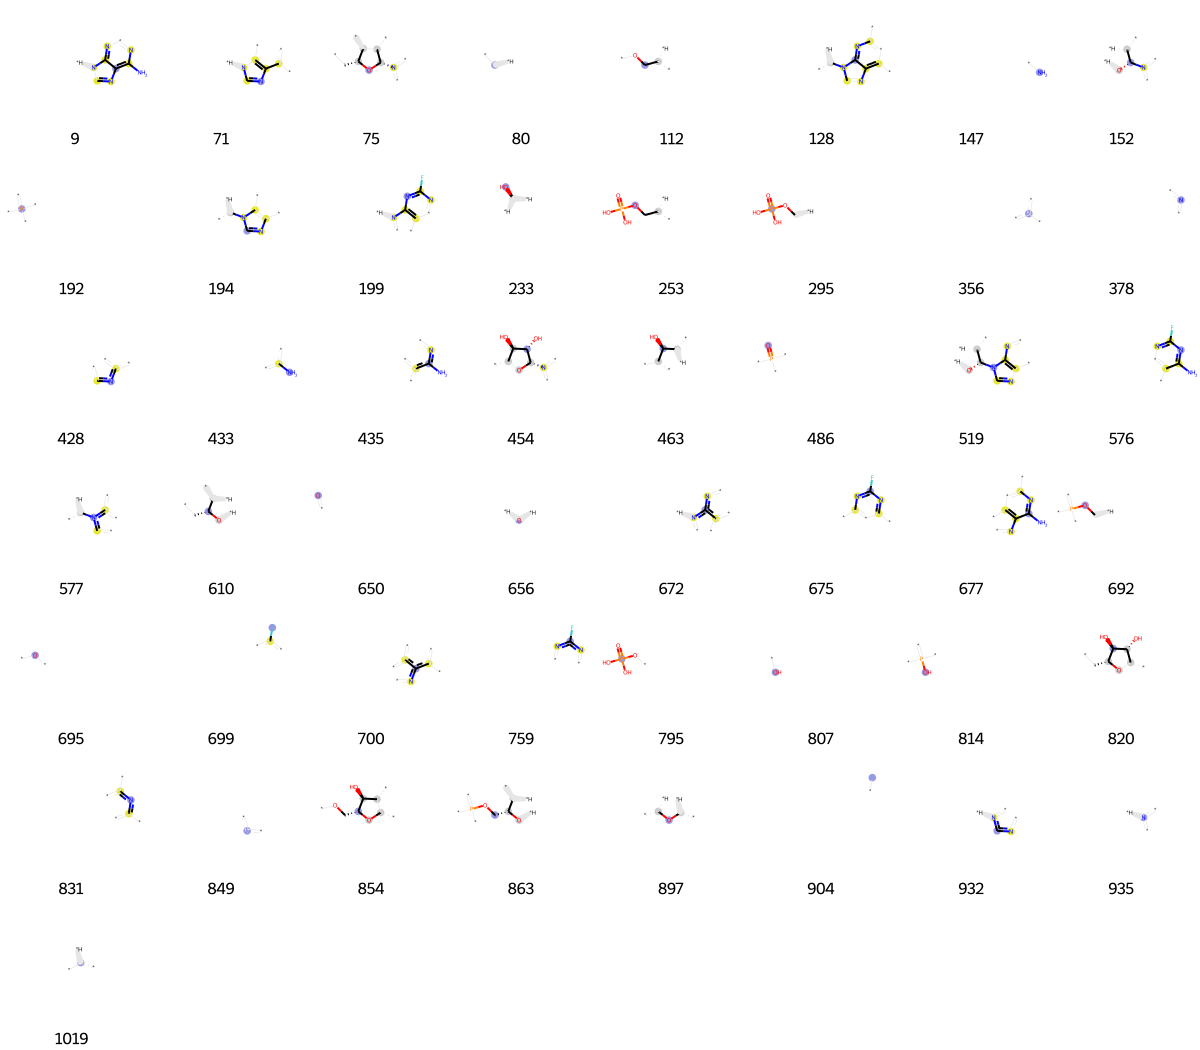

In [1250]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [1251]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[1,
 33,
 64,
 80,
 90,
 104,
 145,
 147,
 175,
 214,
 270,
 283,
 294,
 341,
 356,
 378,
 389,
 415,
 427,
 470,
 478,
 488,
 511,
 526,
 557,
 579,
 650,
 695,
 698,
 706,
 726,
 732,
 759,
 807,
 849,
 893,
 932,
 935]

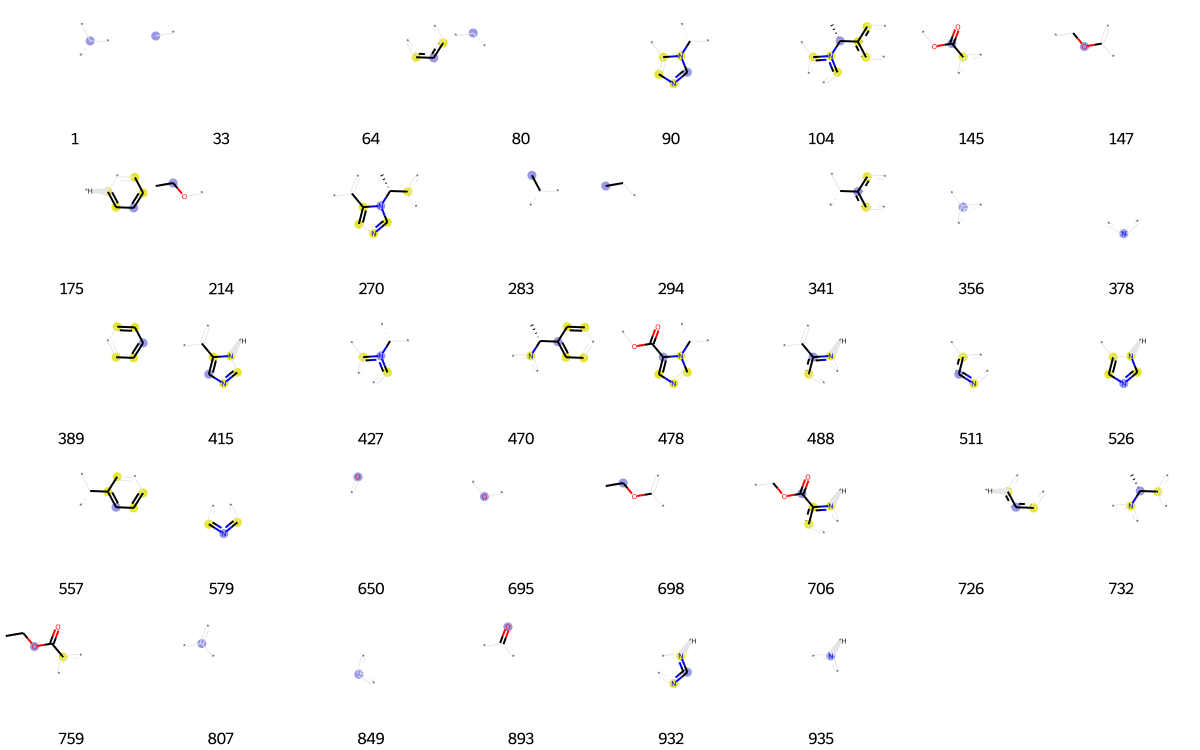

In [1252]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [1253]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[3,
 5,
 29,
 33,
 49,
 80,
 94,
 140,
 142,
 144,
 221,
 226,
 249,
 310,
 314,
 356,
 441,
 451,
 458,
 481,
 488,
 496,
 512,
 575,
 578,
 583,
 614,
 650,
 656,
 695,
 726,
 730,
 807,
 841,
 849,
 875,
 899,
 926,
 941,
 946,
 1019]

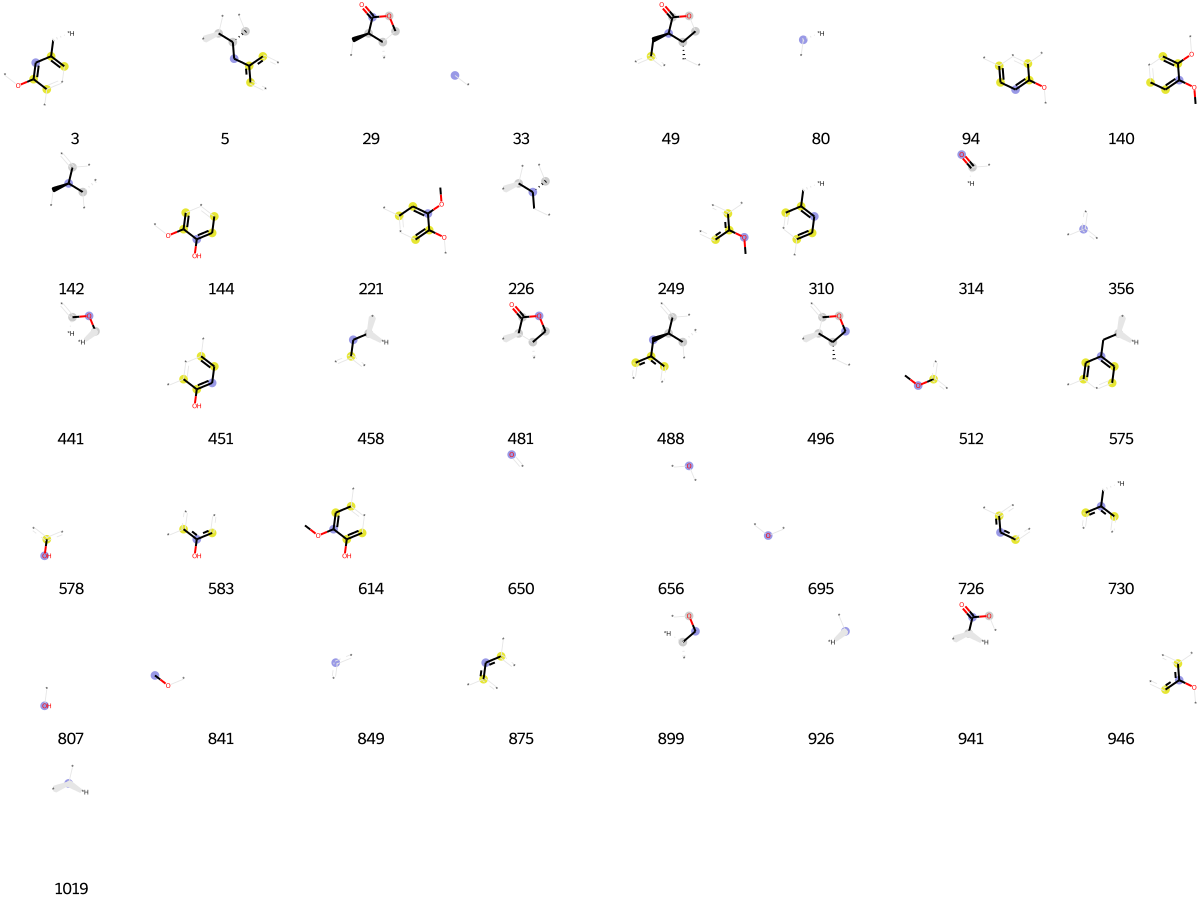

In [1254]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [1255]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[33,
 80,
 90,
 136,
 142,
 169,
 207,
 219,
 248,
 311,
 323,
 338,
 356,
 361,
 378,
 386,
 396,
 428,
 456,
 461,
 469,
 471,
 480,
 494,
 497,
 511,
 518,
 546,
 614,
 622,
 643,
 646,
 650,
 656,
 673,
 695,
 698,
 699,
 701,
 726,
 744,
 745,
 766,
 807,
 835,
 849,
 893,
 896,
 904,
 914,
 926,
 935,
 942,
 985,
 1010,
 1015]

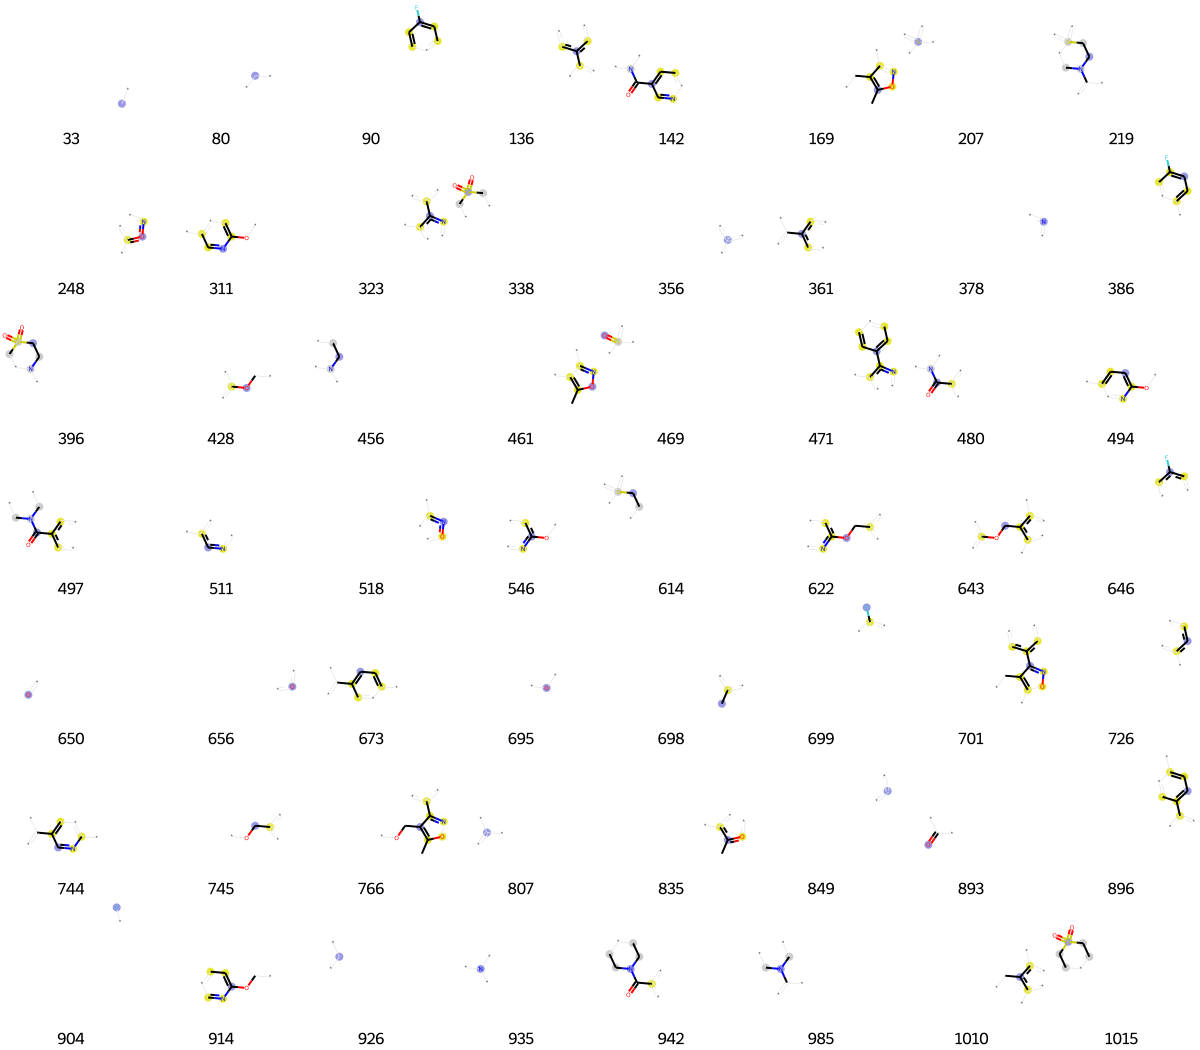

In [1256]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [1257]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


[36,
 78,
 110,
 138,
 140,
 147,
 212,
 242,
 251,
 283,
 301,
 309,
 314,
 356,
 388,
 391,
 404,
 435,
 440,
 456,
 558,
 593,
 624,
 646,
 650,
 684,
 691,
 699,
 719,
 723,
 767,
 807,
 830,
 839,
 847,
 849,
 875,
 879,
 886,
 893,
 904,
 921,
 922,
 926,
 935,
 967,
 999,
 1019]

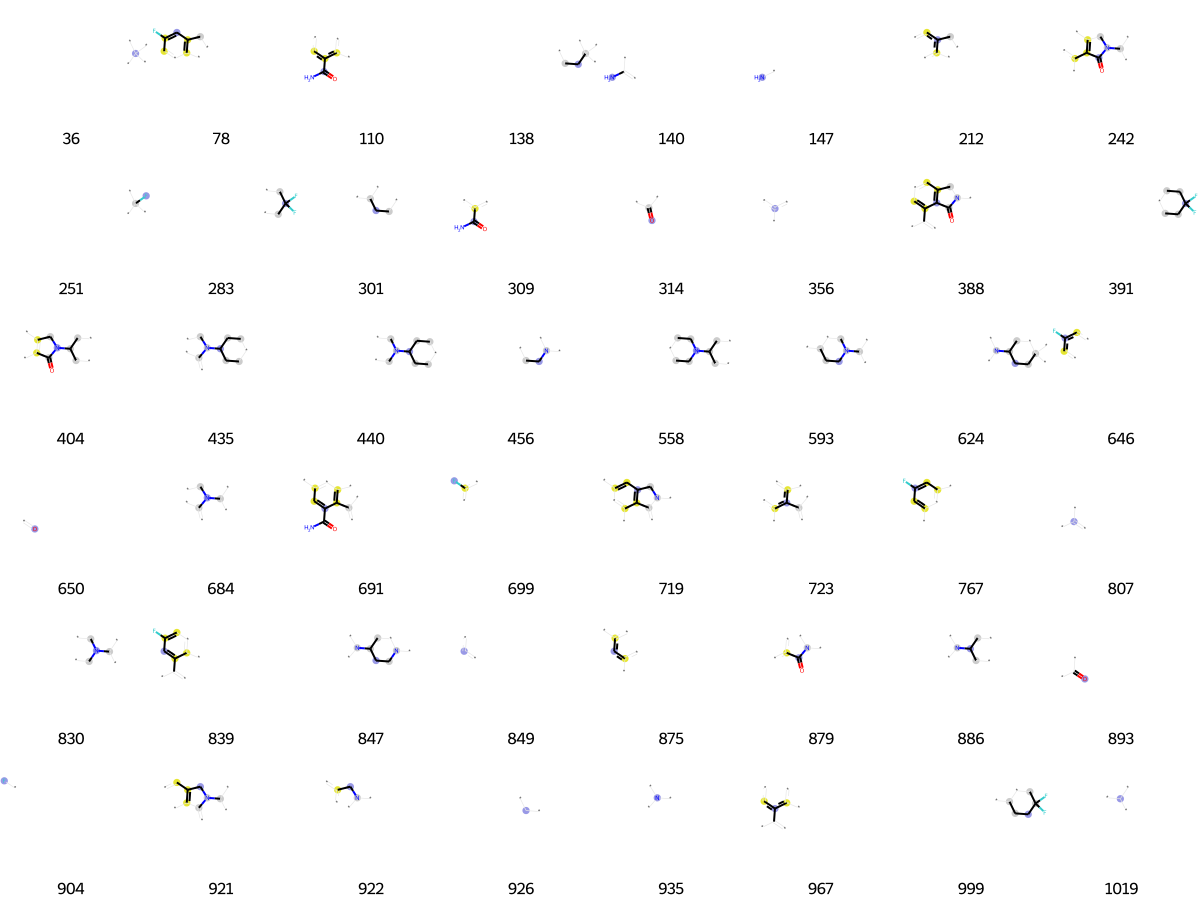

In [1258]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [1259]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[1,
 29,
 33,
 34,
 64,
 74,
 80,
 90,
 128,
 136,
 147,
 175,
 198,
 283,
 294,
 300,
 310,
 320,
 333,
 341,
 343,
 356,
 378,
 389,
 428,
 456,
 489,
 507,
 557,
 603,
 620,
 659,
 667,
 671,
 690,
 708,
 721,
 726,
 730,
 741,
 744,
 747,
 767,
 784,
 786,
 839,
 849,
 865,
 875,
 896,
 912,
 926,
 935]

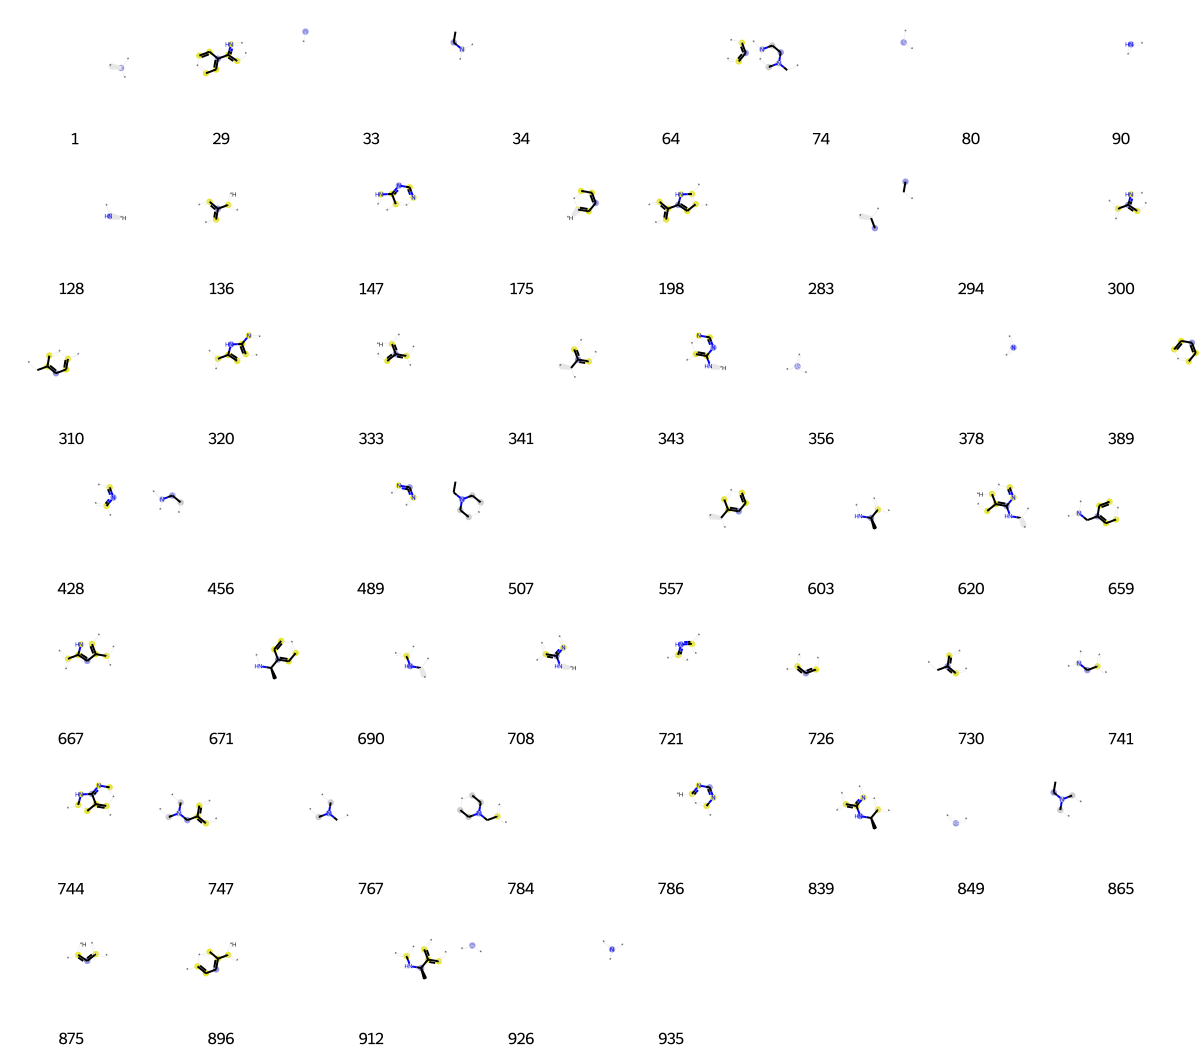

In [1260]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [1261]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[4,
 15,
 25,
 29,
 31,
 36,
 42,
 64,
 90,
 136,
 146,
 147,
 175,
 215,
 222,
 273,
 281,
 301,
 314,
 352,
 356,
 389,
 407,
 424,
 441,
 446,
 456,
 531,
 578,
 633,
 650,
 675,
 680,
 694,
 726,
 736,
 739,
 740,
 749,
 787,
 795,
 808,
 838,
 849,
 926,
 935,
 961,
 984,
 995,
 1019,
 1020]

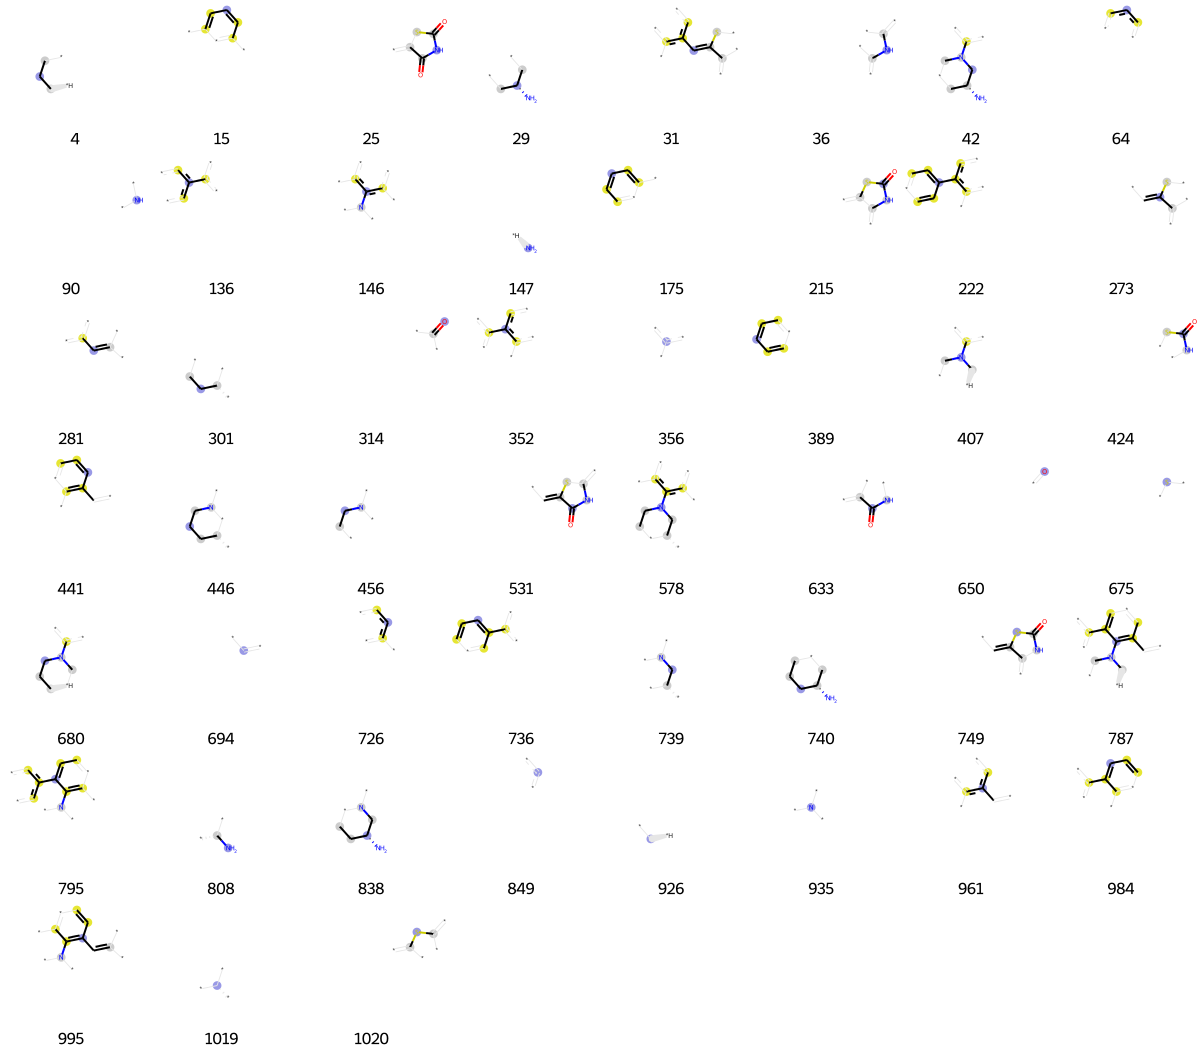

In [1262]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [1263]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[7,
 13,
 16,
 33,
 36,
 46,
 53,
 73,
 80,
 119,
 124,
 138,
 186,
 192,
 222,
 231,
 233,
 245,
 250,
 255,
 265,
 266,
 268,
 285,
 295,
 299,
 301,
 302,
 320,
 345,
 356,
 357,
 359,
 374,
 377,
 385,
 445,
 453,
 463,
 466,
 489,
 492,
 504,
 508,
 519,
 529,
 550,
 598,
 610,
 622,
 645,
 656,
 669,
 694,
 695,
 696,
 722,
 740,
 757,
 767,
 772,
 795,
 807,
 817,
 849,
 860,
 869,
 871,
 890,
 897,
 899,
 926,
 927,
 953,
 999,
 1009,
 1014,
 1017,
 1019]

In [1265]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[1,
 23,
 33,
 64,
 80,
 101,
 116,
 175,
 233,
 237,
 251,
 341,
 356,
 357,
 377,
 385,
 389,
 401,
 423,
 456,
 479,
 540,
 549,
 550,
 558,
 560,
 650,
 686,
 690,
 694,
 726,
 761,
 803,
 807,
 849,
 893,
 967,
 1017]

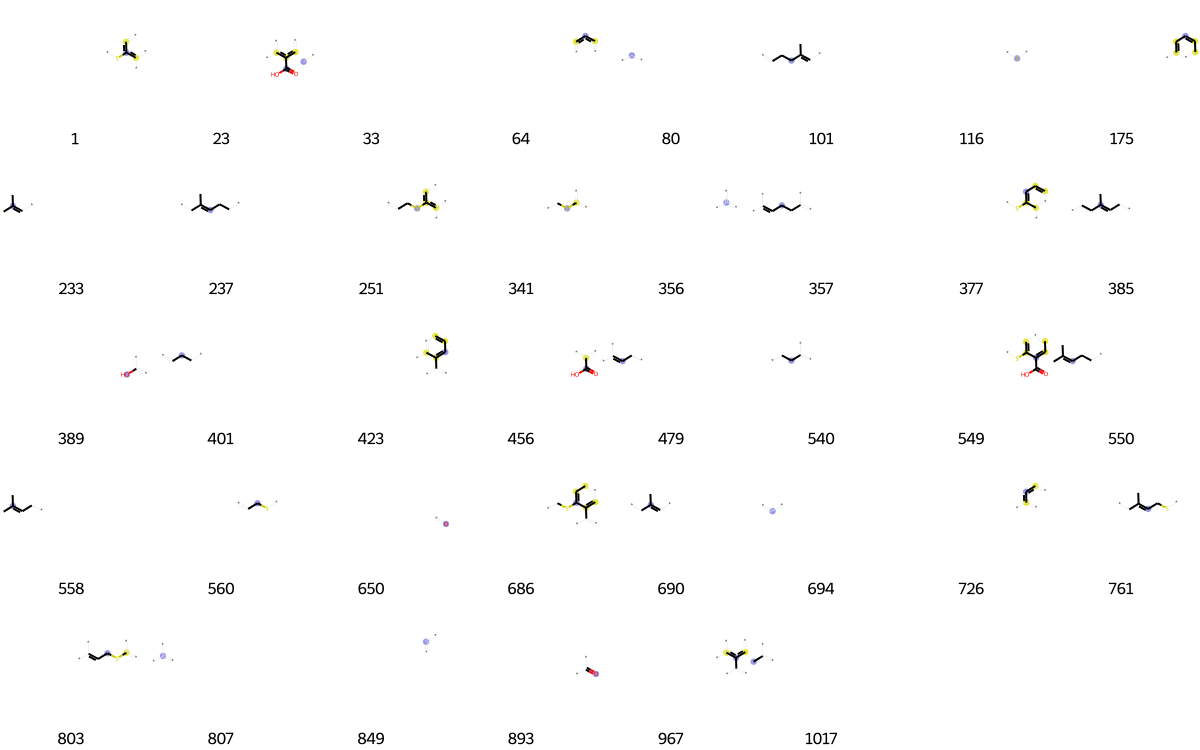

In [1266]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [1267]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[1,
 13,
 33,
 78,
 80,
 117,
 128,
 156,
 248,
 263,
 294,
 347,
 355,
 356,
 361,
 366,
 378,
 389,
 404,
 411,
 420,
 460,
 486,
 526,
 530,
 540,
 559,
 561,
 591,
 645,
 650,
 659,
 666,
 673,
 695,
 713,
 726,
 736,
 739,
 767,
 794,
 807,
 841,
 849,
 875,
 881,
 887,
 893,
 927,
 935,
 955,
 978,
 1005]

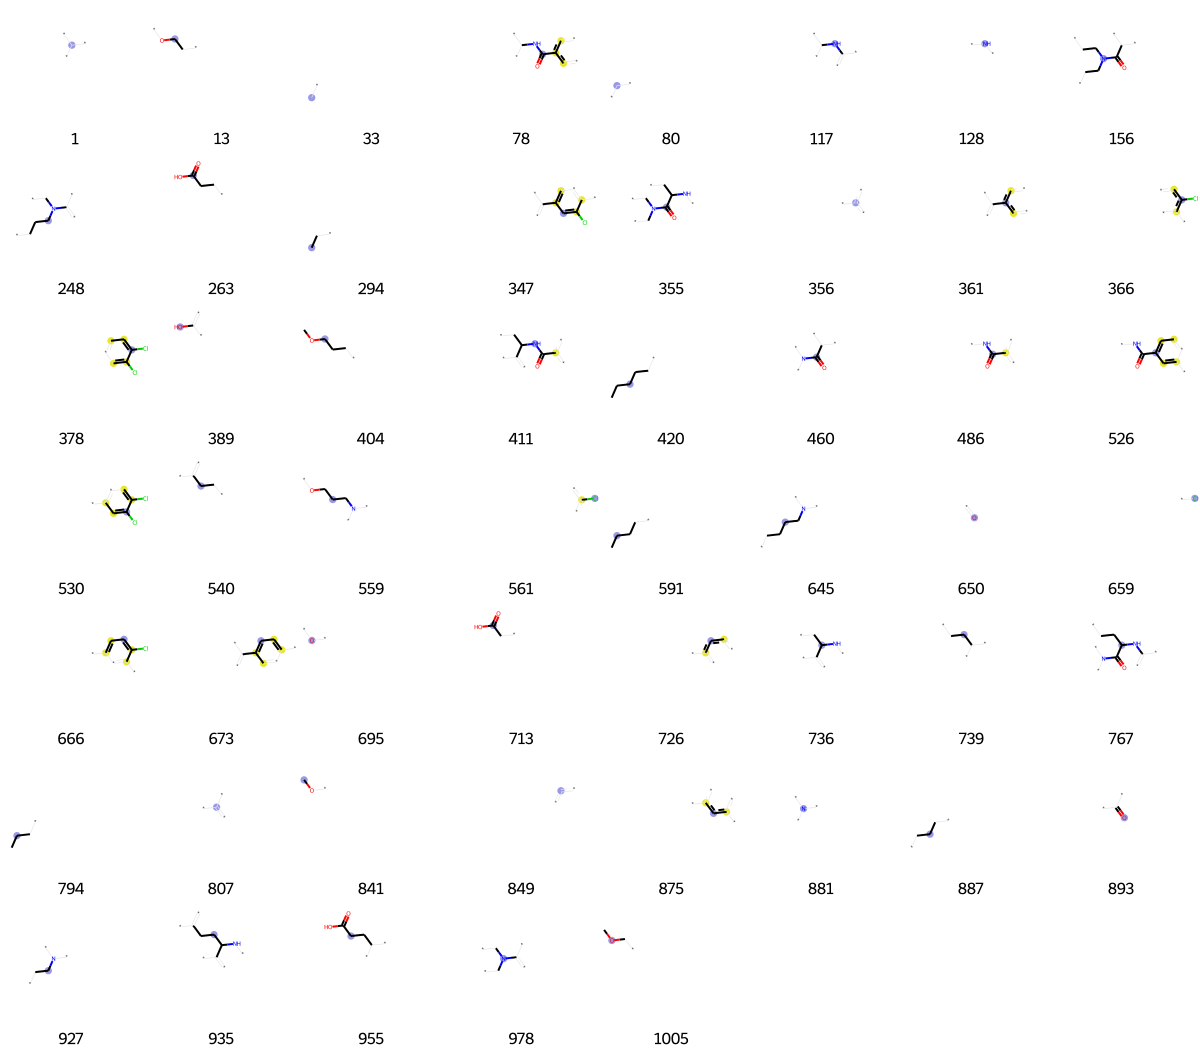

In [1268]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [1269]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[19,
 31,
 64,
 80,
 128,
 141,
 147,
 157,
 197,
 200,
 255,
 284,
 310,
 327,
 329,
 356,
 361,
 378,
 386,
 400,
 433,
 437,
 450,
 463,
 486,
 511,
 533,
 549,
 562,
 579,
 638,
 641,
 646,
 650,
 673,
 694,
 699,
 726,
 730,
 771,
 780,
 792,
 807,
 816,
 832,
 835,
 842,
 849,
 875,
 893,
 904,
 910,
 947,
 994,
 1009]

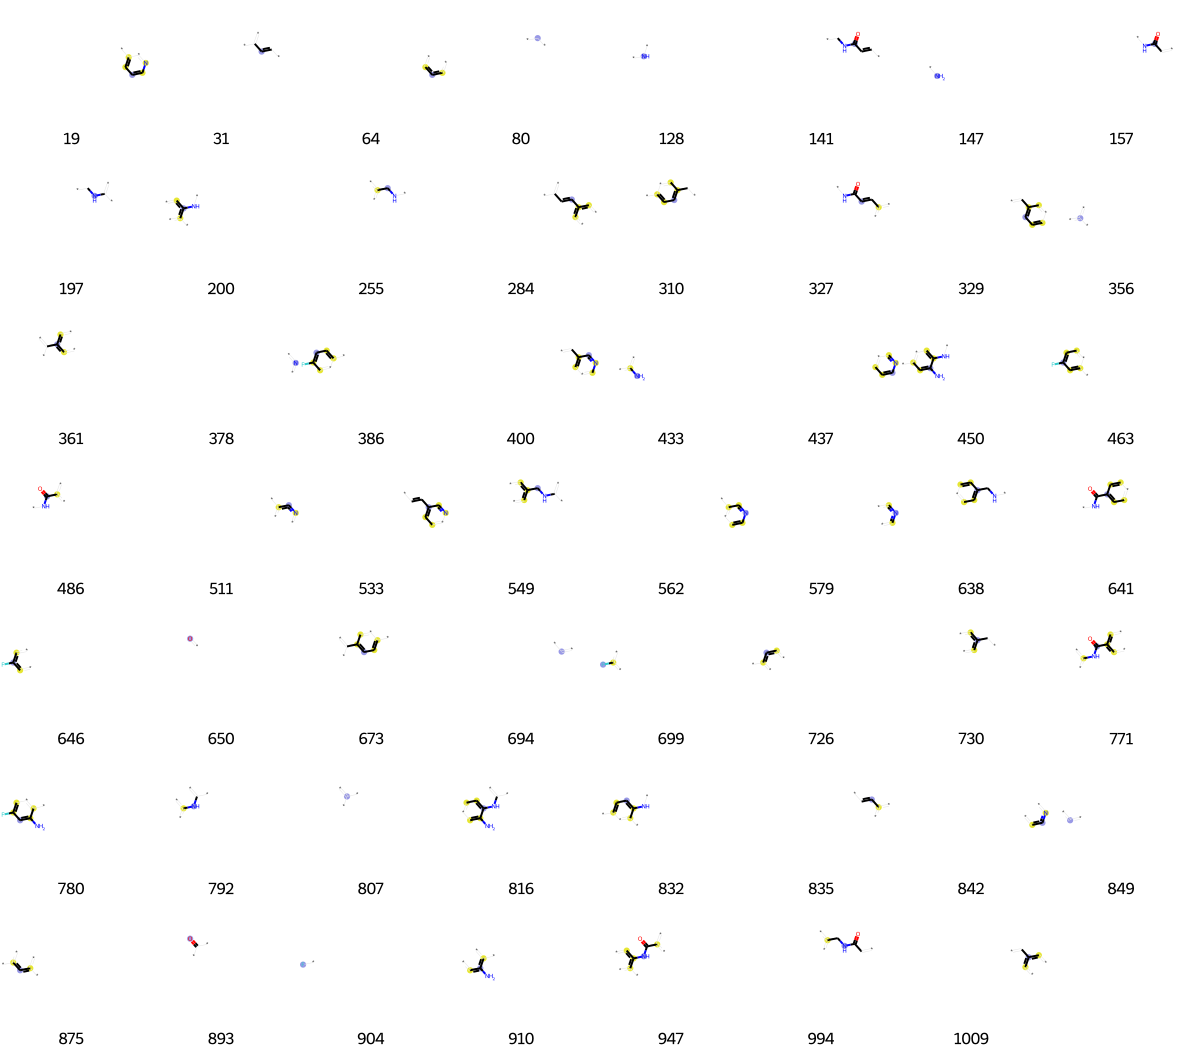

In [1270]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [1271]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[14,
 33,
 64,
 74,
 80,
 112,
 121,
 128,
 139,
 175,
 191,
 200,
 207,
 212,
 233,
 310,
 342,
 350,
 356,
 366,
 378,
 392,
 428,
 452,
 456,
 458,
 491,
 492,
 500,
 511,
 544,
 547,
 558,
 561,
 562,
 601,
 650,
 659,
 672,
 708,
 721,
 726,
 730,
 738,
 741,
 747,
 763,
 767,
 784,
 815,
 831,
 843,
 849,
 881,
 926,
 935,
 992]

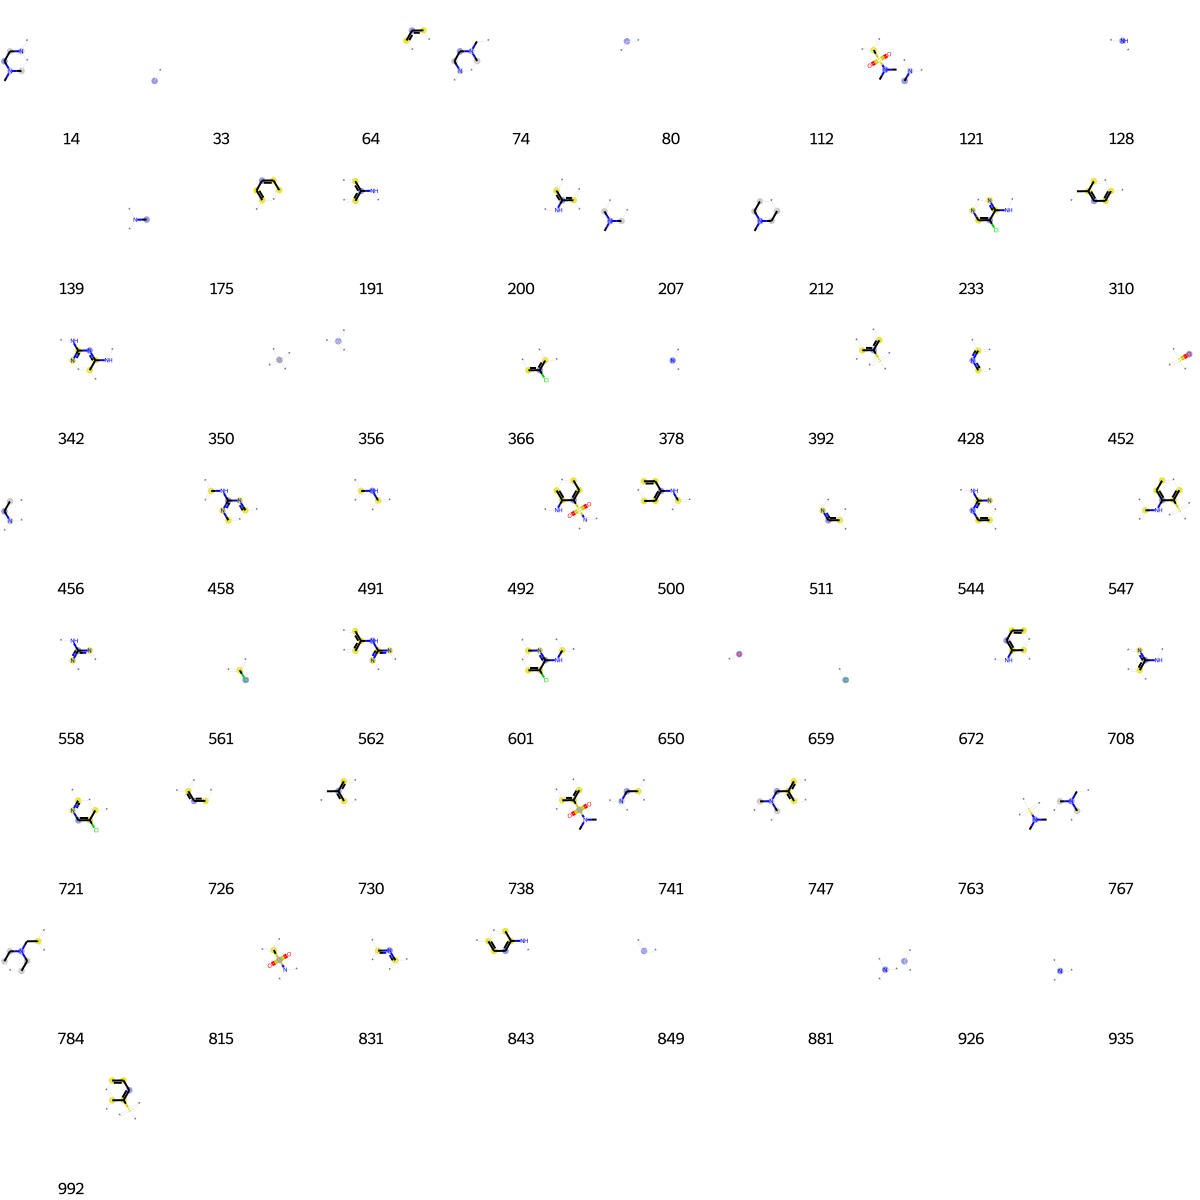

In [1272]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])